# Tiara's Analysis

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re
import seaborn as sns

Reading in cleaned datasets: 

In [5]:
UserNames = pd.read_csv('/Users/tiararaamadia/Downloads/alexis-UserNames.csv')

In [6]:
Education = pd.read_csv('/Users/tiararaamadia/Downloads/alexis-Education.csv')

In [7]:
#unmodified
EduMajorList = pd.read_csv('/Users/tiararaamadia/Downloads/client-EduMajorLists.csv')

In [8]:
Jobs = pd.read_csv('/Users/tiararaamadia/Downloads/alexis-Jobs.csv')

In [9]:
MergeTable = pd.read_csv('/Users/tiararaamadia/Downloads/alexis-MergeTable.csv')

In [10]:
SalarybySOC = pd.read_csv('/Users/tiararaamadia/Downloads/alexis-SalarybySOC.csv')

# Data Cleaning

Deleting useless-like columns:

In [11]:
UserNames = UserNames.drop(['Record ID', 'Old_Person_ID'], axis=1)
UserNames = UserNames.drop(['File_Name', 'LinkedIn URL'], axis=1)

Education = Education.drop(['Unnamed: 0', 'ID'], axis=1)

#pd.set_option('display.max_columns', None)
Jobs = Jobs.drop(['Unnamed: 0', 'ID', 'SOC Code'], axis=1)
Jobs = Jobs.drop(['Start_Date', 'Reverse Chrono Job Order'], axis=1)

MergeTable = MergeTable.drop(['Unnamed: 0', 'ID'], axis=1)

#SalarybySOC = SalarybySOC.drop(['Unnamed: 0', 'ID'], axis=1)

Looking through all the columns and **brainstorming** what type of cross-comparisons we can do:

In [12]:
UserNames.info()
UserNames.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1201 entries, 0 to 1200
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Person_ID             1201 non-null   int64 
 1   First_Name            1201 non-null   object
 2   Last_Name             1201 non-null   object
 3   Gender                1201 non-null   object
 4   Birth Year            1201 non-null   int64 
 5   AICAD / Art School    1201 non-null   object
 6   AdjustedEndMonthYear  1201 non-null   object
dtypes: int64(2), object(5)
memory usage: 65.8+ KB


,Person_ID,Birth Year
count,1201.000000,1201.000000
mean,2140.318068,1987.959201
std,1877.314557,3.590381
min,1069.000000,1965.000000
25%,1371.000000,1986.000000
50%,1674.000000,1988.000000
75%,1977.000000,1991.000000
max,10061.000000,1995.000000


UserNames: My first direction is to determine the age distribution of the dataset. I seperated the ages into two different datasets (Generation X and Generation Y) and counting the values to see the proportions of different ages within the dataset. 

In [18]:
GenX = UserNames.loc[(UserNames['Birth Year'] < 1981)]
GenX['Gender'].value_counts()
len(GenX.index)
GenX['Gender'].value_counts()

#seperating Gen Y
GenY = UserNames.loc[(UserNames['Birth Year'] > 1981)]
GenY['Gender'].value_counts()
GenY['AICAD / Art School'].value_counts()
GenY['AICAD / Art School'].value_counts()

Maryland Institute College of Art             103
Rhode Island School of Design                 100
Pratt Institute                                98
The School of the Art Institute of Chicago     94
ArtCenter College of Design                    92
Otis College of Art and Design                 74
Ringling College of Art and Design             71
Parsons School of Design-The New School        65
California College of the Arts                 62
Ontario College of Art and Design              62
Milwaukee Institute of Art & Design            60
Cornish College of the Arts                    54
Minneapolis College of Art and Design          54
Columbus College of Art & Design               53
Massachusetts College of Art and Design        53
Maine College of Art                           50
Name: AICAD / Art School, dtype: int64

**UserNames**: PersonID, AICAD / Art School, Birth Year, Gender

Notes: UserNames seems to have some basic biographical information regarding past students. They are divided into 2 generations, Generation X (1965-1981) and Generation Y (1981-1995). Generation X only has 44 students so majority of this data is from Millenials (1980-1995). They also have a majority female dataset with over 700 females and 400 male students. Millenials dataset have almost twice the number of male participants (750 vs. 395). Most of the Generation X dataset involve students from ArtCenter College of Design and Maine College of Art. Millenials have alot of dataset rom Maryland Institute College of Art and Rhode Island School of Design. 

Potential Cross-Comparisons: We can cross-compare career pathways between different genders of art students and their career pathways. We can also cross-compare career pathways of art majors from different regions of art schools by adding in another column detailing Region. We can also cross-compare career pathways of art majors from different leagues of art schools (according to top rankings). **cross-compare against rankings of schools or gender of students**

In [21]:
#basic trial and error on utilizing certain exploratory data analysis on Education dataset
Education.head(3)
Education.describe()
Education2 = Education.loc[(Education['Length'] > 30)]
Education['Major'].value_counts()
#pd.set_option("display.max_rows", None)
Education['AICADMajorName'].value_counts()

Design - Graphic Design/Communication Design                 456
No Degree Earned                                             389
Fine Arts                                                    263
Design - Product/Industrial                                  190
Non-AICAD major                                              135
Administration / Business / Management                       128
Digital Arts / Media Arts                                    115
Design - Fashion Design                                      107
Architecture                                                 104
Multidisciplinary / Interdisciplinary                         97
Illustration                                                  80
Design - General                                              69
Photography                                                   58
Design - Interior Design                                      47
Historical / Cultural / Critical / Curatorial Studies         43
Film / Video             

**Education**: PersonID, Normalized Degree, AICADMajorName, SchoolName

Notes: The Length column of the Education has a minimum of 10 days and a maximum of 13 years. I don't know how important Length column in Education has to be. 

Potential Improvements: I think we should first need to sort and delete all the education that does not relate to an AICAD or Art School, or figure out the importance of how we can include the importance of a secondary education is to our mapping of career pathways. There seems to be a whole lot of other education that does not relate to an AICAD / Art School including high school education, boot camps, study abroad programs and internships that might not be relevant. I think we should discuss this within the team. We should also seperate between obtaining an undergraduate education in Arts School versus master's or post-graduate education in Arts School versus certificate or non-diploma coursework in Arts School as a potential cross-comparison. **clean up Normalized Degree column to resemble what we want** If we are including other forms of education, we can cross-compare art students who received a bachelor's versus a master's versus an associate's and the career pathway they have. Or maybe we can cross-compare art students who have additional certification and certification in which and what impact do they have on the industry. 

AICADMajorName: I realised that there are alot of additional education art students receive because the number of No Degree Earned is the 2nd largest occurence in the column. We can investigate the impact that additional, non-diploma education have on the success of art students but I don't know if that would be relevant. No Degree Earned also includes institutions that they transferred from or art schools that they actually attended but didn't graduate from aside from certificates so we can take that into consideration. 

Country: The country in the education mostly relied on Study Abroad so I don't know what the relevance of Country column in the Education could be.  

**EduMajorLists**

Notes: Add a column in any dataset or the most important dataset (MergeTable maybe?) to add in designation of type of major to each person ID. Before we do this, we also need to decide on people with multiple educations and see which designation would we want for that. Some people receive education from multiple AICAD schools as well (bachelors and masters) so maybe that's not the wisest thing, we can just put those people in a lsit and then narrow down rows based off of it? 

In [95]:
#investigating Jobs column
#random code
Jobs['Adjusted SOC Code (use this)'].value_counts()
post_grad_jobs = Jobs.loc[Jobs['Post Undergrad Job Order'] >= 1]
post_grad_jobs['Sub-industry'].value_counts()

4 - Design and product                                 1751
1 - Community, Social Service, and Education (CoSE)    1005
3 - Fashion and apparel                                 696
12 - Branding, Advertising and PR Agencies              611
6 - Sales, Marketing and Consulting                     531
2 - Science and technology                              425
10 - Retail and wholesale                               421
16 - Commercial Art and Graphic Design                  389
1 - Architecture and interior design                    309
14 - Publishing and Media Communications                290
7 - All other                                           256
11 - Studio Arts, Galleries and Museums                 191
3 - Health and Wellness (HeWe)                          185
8 - Financial services                                  184
5 - Entertainment                                       174
17 - Filmmaking, Television and Music                   108
9 - Travel & Leisure                    

**Jobs** 

Notes: Students also include their voluntary experience in the form of Member so it would be good to remove that if that's not relevant to career pathways. We could also group together the career pathways based on SOC Code and/or Career Community, based on the different schools or different majors. I would also think that the Sub-Industry column would be beneficial. Maybe we can cross-map entry-level job positions to the different career community and then sub-industry.

Job Order and Types of Jobs:
It seems like alot of art students have an entry-level job as their 1-12th Job Order, but 1/3 of art students have entry level job positions as before/during graduation (one way to exclude it is to do it by post-undergrad job order). 

Notes: What does FirstJobGap mean? What do the pivot columns mean?

Potential To-Dos and some Risks associated: 

1. Adding column for median Salaries according to MergedSOCCodes in MergeTable 
2. Adding column for Major SOC Codes to end of Education table (Risk: one student can have multiple majors according to their education history
3. Cleaning some values of columns according to goal that we want (etc. cleaning additional educational history that are minor (certificates, transferred etc.) or cleaning educational history that does not relate to their degree (study abroad, non-ACAID schools etc.) to be discussed with group

Potential Directions to go in and maybe how to do it

1. Grouping students via undergraduate education and post-graduate education
a) What career communities (and also go deeper into sub-industries) do art students go to after attending an AICAD school for undergraduate education vs. post-graduate education // ideally we will allow unfinished or no degree into the equation. What career communities (and sub-industries) do AICAD certification holders go to? 

2. Grouping Career Communities (and Sub-Industries) with number of occurences in Job Order
a) What careers do art students (in general or could be per school or per majors) go into after graduation? how about in the middle of their career (find out what middle-career mean)? how about the career community that they stay in the longest?

3. Grouping Career Communities (and Sub-Industries) with Professional Pivots
a) What careers do art student stay in mid-career or settle down with (maybe looking at job length) 

4. Grouping Job Order or Sub-Industries with Salaries
a) At what point of their career do art students make the most money? How much do art students make after attending their undergraduate school or master's school (is there a difference)? In what professions are they making that money? 

# Functions

This function, value_counts(df), takes a dataframe df as input and computes the frequency of unique values for each column in the dataframe. It initializes an empty dictionary value_counts, iterates through each column in the dataframe, and computes the value counts using the value_counts() method of pandas Series. Finally, it returns the value_counts dictionary, where the keys are the column names and the values are the respective value count Series.

In [2]:
def value_counts(df): 
    value_counts = {}
    for col in df.columns:
        value_counts[col] = df[col].value_counts()
    return value_counts

The categorize_words(word) function takes an input word, which represents the name of an art or design college, and returns a string representing the geographical category the college belongs to. The function uses a series of if-elif statements to check if the input word matches the name of a specific art or design college. If a match is found, the function returns the corresponding geographical category, such as 'Midwest', 'West Coast', 'East Coast', 'Southern', or 'International'. If no match is found, the function returns the default category 'Non-Art Undergrad'. This function is useful for categorizing art and design colleges based on their geographical location.

In [ ]:
#write function that adds a column pertaining to which region their college is in

def categorize_words(word):
    if word == 'Columbus College of Art & Design':
        return 'Midwest'
    elif word == 'Cornish College of the Arts':
        return 'West Coast'
    elif word == 'Massachusetts College of Art and Design':
        return 'East Coast'
    elif word == 'Minneapolis College of Art and Design':
        return 'West Coast'
    elif word == 'Otis College of Art and Design':
        return 'West Coast'
    elif word == 'Ringling College of Art and Design':
        return 'Southern'
    elif word == 'ArtCenter College of Design':
        return 'West Coast'
    elif word == 'Maryland Institute College of Art':
        return 'East Coast'
    elif word == 'Parsons School of Design':
        return 'East Coast'
    elif word == 'Pratt Institute':
        return 'East Coast'
    elif word == 'Rhode Island School of Design':
        return 'East Coast'
    elif word == 'School of the Art Institute of Chicago':
        return 'Midwest'
    elif word == 'California College of the Arts':
        return 'West Coast'
    elif word == 'Maine College of Art':
        return 'East Coast'
    elif word == 'Ontario College of Art and Design':
        return 'International'
    elif word == 'Milwaukee Institute of Art & Design':
        return 'Midwest'
    else:
        return 'Non-Art Undergrad'

The is_certificate_bootcamp(degree) function takes a single input, degree, which represents the type of degree or program. The function checks whether the given degree is a 'Certificate' program or contains the words 'Boot Camp'. If either of these conditions is met, the function returns True, indicating that the given degree is either a certificate program or a boot camp. If neither condition is met, the function returns False. This function is useful for identifying if a specific degree or program is a certificate program or a boot camp.

In [ ]:
def is_certificate_bootcamp(degree):
  if degree == 'Certificate' or 'Boot Camp' in degree:
    return True
  else:
    return False

The is_short_edu(degree) function takes a single input, degree, which represents the type of degree or program. The function checks if the given degree meets one of the following conditions: it is a 'Certificate' program, contains the words 'Boot Camp', contains the words 'Professional Development', or contains the word 'Special'. If any of these conditions are met, the function returns True, indicating that the given degree is a short-term or specialized educational program. If none of the conditions are met, the function returns False. This function is useful for identifying if a specific degree or program is a short-term or specialized educational offering.

In [ ]:
def is_short_edu(degree):
    if degree == 'Certificate' or 'Boot Camp' in degree or 'Professional Development' in degree or 'Special' in degree:
        return True
    else:
        return False

The add_short_edu_program_column(MergeTable) function takes a single input, MergeTable, which is a pandas DataFrame. The function is designed to add a new column named "Short Edu Program" to the DataFrame, indicating whether a particular row has a short-term or specialized educational program. The short-term or specialized educational programs are defined as "Professional Development", "Certificate", "Boot Camp", or "Special". The function uses the apply() method with a lambda function to check if the "Normalized Degree" column contains any of the specified short-term or specialized education program terms. If a term is found, the corresponding entry in the "Short Edu Program" column is set to True, otherwise, it is set to False. Finally, the updated DataFrame is returned. This function is useful for analyzing a dataset and identifying rows that contain short-term or specialized educational programs.

In [ ]:
#isolating dataset to include optional education programs, pulling in rows of Person_ID that has degrees of "Personal Development, Certificate, Boot Camp, Special"
def add_short_edu_program_column(MergeTable):
    short_edu_program = ["Professional Development", "Certificate", "Boot Camp", "Special"]
    MergeTable["Short Edu Program"] = MergeTable["Normalized Degree"].apply(lambda x: True if isinstance(x, str) and any(term in x for term in short_edu_program) else False)
    return MergeTable

This function creates a dataset that only isolates Person_IDs based on a certain major, and then again modifying that dataframe to only consider jobs post graduation (based on feedback from our client). Then, we calculate the frequency of different career communities divided by post undergrad job order and then sorted this dataframe in a discending order of frequency for better visualization. 

The community_industry_by_major(set) function takes a single input, set, which is a set of unique Person_IDs for people with a specific major. The purpose of the function is to analyze the frequency of different career communities and sub-industries for people with the specified major, by their post-undergrad job order.

In [ ]:
def community_industry_by_major(set):
    # Convert GraphicDesignList to a list object
    major_list = list(set)
    
    # Create a new DataFrame called "graphic_design_data" that only contains rows where the "Person_ID" column is in GraphicDesignList
    major_data = MergeTable[MergeTable['Person_ID'].isin(major_list)].copy()

    # Reset the index of the new DataFrame
    major_data.reset_index(drop=True, inplace=True)

    # Create a new DataFrame called "after_postgrad_data" that only contains rows where the "Job Post Graduation" column has value "After"
    major_postgrad_data = major_data[major_data['Job Post Graduation'] == 'After'].copy()

    # Reset the index of the new DataFrame
    major_postgrad_data.reset_index(drop=True, inplace=True)

    # Calculate the frequency of different career communities by post-undergrad job order
    career_freq = major_postgrad_data.groupby(["Post Undergrad Job Order", "Career Community"])["Career Community"].size().unstack()

    # Sort the DataFrame in descending order of frequency
    career_freq = career_freq.loc[:, career_freq.sum().sort_values(ascending=True).index]

    # Plot the stacked bar chart
    career_freq.plot(kind="bar", stacked=True, figsize=(10,6))

    # Set the title and axis labels
    plt.title("Frequency of Career Communities by Post-Undergrad Job Order")
    plt.xlabel("Post-Undergrad Job Order")
    plt.ylabel("Frequency")

    # Show the plot
    plt.show()

    # Calculate the frequency of different sub-industries by post-undergrad job order
    industry_freq = major_postgrad_data.groupby(["Post Undergrad Job Order", "Sub-industry"])["Sub-industry"].size().unstack()

    # Sort the DataFrame in descending order of frequency
    industry_freq = industry_freq.loc[:, industry_freq.sum().sort_values(ascending=True).index]

    # Plot the stacked bar chart
    industry_freq.plot(kind="bar", stacked=True, figsize=(10,6))

    # Set the title and axis labels
    plt.title("Frequency of Sub-Industries by Post-Undergrad Job Order")
    plt.xlabel("Post-Undergrad Job Order")
    plt.ylabel("Frequency")

    # Show the plot
    plt.show()

The is_associate(degree) function takes a single input, degree, which represents the type of degree or program. The function checks if the given degree contains the word 'Associate ' (with a trailing space to avoid false positives). If the condition is met, the function returns True, indicating that the given degree is an associate degree. If the condition is not met, the function returns False. This function is useful for identifying if a specific degree or program is an associate degree.

In [ ]:
# Define a function that takes a degree string as input, and returns True if the degree contains the string 'Associate ', False otherwise

def is_associate(degree):
    if 'Associate ' in degree:
        return True
    else:
        return False

The is_master(degree) function takes a single input, degree, which represents the type of degree or program. The function checks if the given degree contains one of the following strings: 'Master ' (with a trailing space to avoid false positives), 'MBA', or 'Doctor'. If any of these conditions are met, the function returns True, indicating that the given degree is a master's, MBA, or doctoral degree. If none of the conditions are met, the function returns False. This function is useful for identifying if a specific degree or program is a master's, MBA, or doctoral degree.

In [ ]:
# Define a function that takes a degree string as input, and returns True if the degree contains the string 'Master ', 'MBA', or 'Doctor', False otherwise

def is_master(degree):
    if 'Master ' in degree:
        return True
    elif 'MBA' in degree: 
        return True
    elif 'Doctor' in degree: 
        return True
    else:
        return False

This function looks to create a new column within the main MergeTable database that returns True if the row matches the Person_ID that is included in a specific major. This function will later than be used to count any difference in proportions of Person_IDs within career communities and sub-industries throughout their career trajectory.

The add_major_column(MergeTable, major_list) function takes two inputs: MergeTable, which is a pandas DataFrame, and major_list, which is a list of unique Person_IDs for people with a specific major. The purpose of the function is to add a new column named "Major" to the DataFrame, indicating whether a particular row has a person with the specified major.

In [ ]:
def add_major_column(MergeTable, major_list):
    # Create a new column "Major" in MergeTable with default value of False
    MergeTable["Major"] = False

    # Set the "Major" column to True for the rows where "Person_ID" is in major_list
    MergeTable.loc[MergeTable["Person_ID"].isin(major_list), "Major"] = True

    return MergeTable

The plot_proportion_major_by_career_community(df) function takes a single input, df, which is a pandas DataFrame. The purpose of the function is to plot the proportion of students holding a specific major within different career communities and sub-industries, by their post-undergrad job order.

The function defines an inner helper function, plot_stacked_bar_chart(df, group_column, title), which takes three inputs: df, a DataFrame; group_column, the column to group the data by (either career community or sub-industry); and title, the title for the plot.

In [ ]:
def plot_proportion_major_by_career_community(df):
    def plot_stacked_bar_chart(df, group_column, title):
        
        df = df[df['Job Post Graduation'] == 'After'].copy()

        # Reset the index of the new DataFrame
        df.reset_index(drop=True, inplace=True)
        
        # First, create a DataFrame with unique Person_IDs and the count of those with Major=True
        major_true_count = df[df["Major"] == True].groupby(["Post Undergrad Job Order", group_column])["Person_ID"].nunique().reset_index(name="Major_True_Count")

        # Calculate the total number of unique Person_IDs for each "Post Undergrad Job Order" and group_column
        total_person_count = df.groupby(["Post Undergrad Job Order", group_column])["Person_ID"].nunique().reset_index(name="Total_Person_Count")

        # Merge the two DataFrames on "Post Undergrad Job Order" and group_column
        merged_df = pd.merge(major_true_count, total_person_count, on=["Post Undergrad Job Order", group_column])

        ## WARNING: this specific line of function may be changed to generate more accurate results
        # Calculate the proportion of Person_ID who has "Major" = True versus the total number of Person_ID for each "Post Undergrad Job Order" and group_column
        merged_df["Proportion"] = merged_df["Major_True_Count"] / merged_df["Total_Person_Count"]

        # Pivot the merged_df DataFrame to get a multi-indexed DataFrame with "Post Undergrad Job Order" and group_column as indexes and "Proportion" as values
        prop_major_by_group = merged_df.pivot_table(index="Post Undergrad Job Order", columns=group_column, values="Proportion")

        # Sort the columns in descending order of the proportion of rows where "Major" is True
        prop_major_by_group = prop_major_by_group.loc[:, prop_major_by_group.mean().sort_values(ascending=True).index]

        # Plot the stacked bar chart for group_column
        ax = prop_major_by_group.plot(kind="bar", stacked=True, figsize=(10, 6))

        # Set the title and axis labels for group_column plot
        plt.title(title)
        plt.xlabel("Post-Undergrad Job Order")
        plt.ylabel("Proportion of Students holding Major")
        
        plt.show()

        # Return the prop_major_by_group DataFrame
        return prop_major_by_group

    # Call the helper function for Career Community and Sub-industry columns
    result_career_community = plot_stacked_bar_chart(graphic_design, "Career Community", "Proportion of Major by Career Community and Post-Undergrad Job Order")
    result_sub_industry = plot_stacked_bar_chart(graphic_design, "Sub-industry", "Proportion of Major by Sub-industry and Post-Undergrad Job Order")

    return result_career_community, result_sub_industry

# Goal 1: Label AICAD/Non-AICAD Schools

We started off by labeling which of these Person_IDs have AICAD certification in their undergraduate pathway. I did this by creating an additional column in MergeTable classifying True or False depending if a Person_ID has an AICAD school in their Education dataset.

In [96]:
# List of values to match against
AICAD_list = ['Alberta University of the Arts', 'Art Academy of Cincinnati', 'Art Center College of Design',
             'California College of the Arts', 'California Institute of the Arts', 'College for Creative Studies', 
             'Columbus College of Art and Design', 'Cornish College of the Arts', 'Delaware College of Art and Design', 
             'Emily Carr University of Art and Design', 'Kansas City Art Institute', 'Laguna College of Art and Design', 'Lesley Art + Design',
             'Maine College of Art & Design', 'Maryland Institute College of Art', 'Massachusetts College of Art and Design', 
             'Milwaukee Institute of Art & Design', 'Minneapolis College of Art and Design', 'Montserrat College of Art', 
             'Moore College of Art and Design', 'New York School Of Interior Design', 'NSCAD University (Nova Scotia College of Art and Design)', 
             'Nova Scotia College of Art and Design', 'OCAD University', 'Otis College of Art and Design', 'Pacific Northwest College of Art', 
             'Parsons School of Design', 'Pennsylvania Academy of the Fine Arts', 'Pennsylvania College of Art and Design', 'Pratt Institute', 
             'Rhode Island School of Design', 'Ringling College of Art and Design', 'School of the Art Institute of Chicago', 
             'School of the Museum of Fine Arts at Tufts', 'School of Visual Arts', 'The University of the Arts']

# Create a new column "category" and set its values based on whether the value in "col1" matches any value in "match_list"
MergeTable['AICAD/Non-AICAD'] = np.where(Education['SchoolName'].isin(AICAD_list), 'AICAD', 'Non-AICAD')

# Goal 2: Find basic insights on people who have had jobs before/during college.

In [22]:
#isolating the pre-jobs
Job_Before_Grad = Jobs[Jobs['Job Post Graduation'] == 'Before/During']

What industries were people working in during college?

In [98]:
Jobs['Job Post Graduation'].value_counts()

After            7943
Before/During    2305
Name: Job Post Graduation, dtype: int64

Notes: *Disclaimer that this database includes all jobs for every person (so duplicate Person_ID happen with multiple jobs) Art students in this database have had 2305 jobs before they graduated.

In [1]:
Job_Before_Grad.head()

NameError: name 'Job_Before_Grad' is not defined

In [4]:
#applying value counts function to research how many pre-graduation 
#jobs does each Person_ID have
value_counts(Job_Before_Grad).head(3)

NameError: name 'value_counts' is not defined

Notes: Most of the jobs that art students hold include design or intern related work (top 5-8 are design related). They work as assistants or designers (either frelance or for a business before they graduate. This is typical of normal students to hold associate or intern level jobs. However, a very good amount of them (100) hold Manager/Director position so I will have to look more into what types of industries or businesses allow them to hold such a position at a young age. Majority of these job levels are entry-level (1822 while the rest are in the mid to low 100s. 

The types of jobs they tend to get into include:  the Arts, Design, Entertainment, Sports and Media Occupations (1546 of these jobs) and more singularly something related to Sales, Education/Library and Administrative Support). At some schools, art students usually have jobs tied to their school but not a marginally large amount to take into consideration so just accept that the types of companies art students go into is very diversified. 

Career Communities include Business, Entrepreneurship or Media and the Arts as well as some Community Service, but the sub-industries include Community, Social Service as the main point and then Design/product so I will have to dig deeper into that career community vs. sub-industries. Majority of the times they have doing these jobs before graduation is around 0.3-0.1 months so I predict it is a summer position or 0.9 months which I predict is an on-campus job position during the academic year. The types of cities they went to are varied (very diverse) but majority of these are in New York and then California (but I would doublecheck based on if majority of these AICAD schools are based in New York or not). 

In [3]:
#understanding the job title popularity of pre-graduation jobs (which titles are most popular)
#pd.set_option('display.max_rows', 500)
Job_Before_Grad['Job_Title'].value_counts().head(3)

NameError: name 'Job_Before_Grad' is not defined

Notes: Majority of jobs art students have before they graduate include design-related work (top 5 has the word design in their job title)

In [2]:
#understanding the distribution of certain job levels in the pre-graduation dataset
Job_Before_Grad['Job Level Keyword'].value_counts().head(3)

NameError: name 'Job_Before_Grad' is not defined

# Goal 3: What impact does the geographical region of your undergraduate degree do with the types of careers you have?

Before moving onto the analysis, we will need to standardize any college names to make sure we are accounting for them correctly. We will also need to divide the colleges based on geographic region in order to understand if there are any differences in outcomes.

In [10]:
#standardize all college names
MergeTable.loc[MergeTable['UnderGrad College'] == 'Ringling School of Art and Design', 'UnderGrad College'] = 'Ringling College of Art and Design'
MergeTable.loc[MergeTable['UnderGrad College'] == 'Parsons School of Design-The New School', 'UnderGrad College'] = 'Parsons School of Design'
MergeTable.loc[MergeTable['UnderGrad College'] == 'Art Center College of Design', 'UnderGrad College'] = 'ArtCenter College of Design'
MergeTable.loc[MergeTable['UnderGrad College'] == 'The School of the Art Institute of Chicago', 'UnderGrad College'] = 'School of the Art Institute of Chicago'

#rechecking
MergeTable['UnderGrad College'].unique()


array(['Columbus College of Art & Design', nan,
       'Cornish College of the Arts',
       'Massachusetts College of Art and Design',
       'Minneapolis College of Art and Design',
       'Otis College of Art and Design',
       'Ringling College of Art and Design',
       'ArtCenter College of Design', 'Maryland Institute College of Art',
       'Parsons School of Design', 'Pratt Institute',
       'Rhode Island School of Design',
       'School of the Art Institute of Chicago',
       'California College of the Arts', 'Maine College of Art',
       'Ontario College of Art and Design',
       'Milwaukee Institute of Art & Design'], dtype=object)

In [13]:
MergeTable['Art School Region'] = MergeTable['UnderGrad College'].apply(categorize_words)

#re-checking
MergeTable['Art School Region'].value_counts()

#counting the number of rows in MergeTable for each 
#unique combination of values in the 'Art School Region' and 'Career Community, Sub-industry' columns
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)

MergeTable.groupby(['Art School Region', 'Career Community']).size()
MergeTable.groupby(['Art School Region', 'Sub-industry']).size()

NameError: name 'categorize_words' is not defined

The above outputs the frequency of certain industries within schools seperated by certain geographic regions. By looking at these values we can dig deeper into the most/least popular industries between regions and see if there are noticeable differences. This is an important question to ask because we need to understand if geography is an important factor in someone's career trajectory. If it is, it will impact college admissions process for both prospective students and the administration alike.

<AxesSubplot:xlabel='Sub-industry', ylabel='Art School Region'>

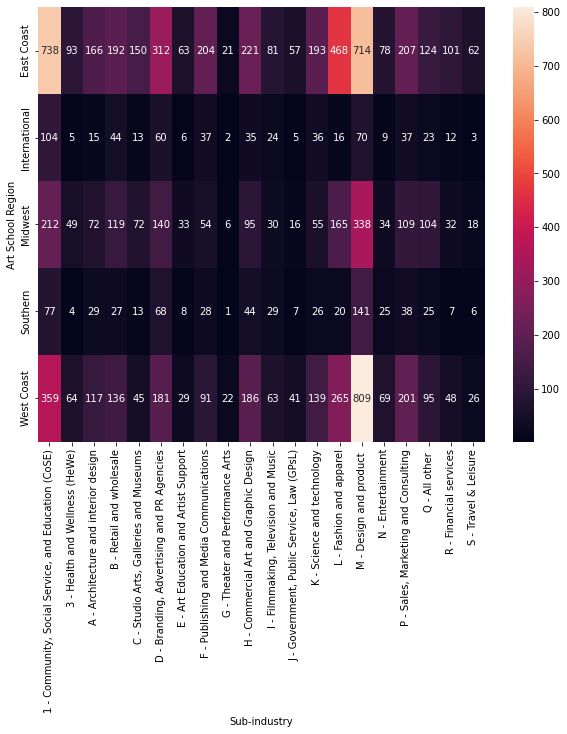

In [12]:
counts = MergeTable.groupby(['Art School Region', 'Sub-industry']).size().reset_index(name='counts')

# Create a pivot table to reshape the data
counts_pivot = counts.pivot(index='Art School Region', columns='Sub-industry', values='counts')

# Create the heat map
plt.figure(figsize=(10, 8))
sns.heatmap(counts_pivot, annot=True, fmt='g')

Notes: Distribution of certain industries seem to not change despite the change of region. I can see this by looking at the prospective difference in color gradiation per region, removing any differences in objective numbers (ie. there will be more graduates in the West Coast than Southern region because there are more A&D schools coming from there). 

In [106]:
# group the data by 'Art School Region' and 'Sub-industry' and count the occurrences
counts_region_industry = MergeTable.groupby(['Art School Region', 'Sub-industry']).size().reset_index(name='counts_region_industry')

# rank the occurrences of 'Sub-industry' within each 'Art School Region'
counts_region_industry['rank'] = counts_region_industry.groupby('Art School Region')['counts_region_industry'].rank(ascending=False)

# sort the data by 'Art School Region', 'counts_region_industry', and 'rank' in descending order
counts_region_industry = counts_region_industry.sort_values(by=['Art School Region', 'counts_region_industry', 'rank'], ascending=[True, False, True])

# display the sorted data
print(counts_region_industry)


   Art School Region                                       Sub-industry  \
0         East Coast  1 - Community, Social Service, and Education (...   
14        East Coast                            M - Design and product    
13        East Coast                            L - Fashion and apparel   
5         East Coast          D - Branding, Advertising and PR Agencies   
9         East Coast              H - Commercial Art and Graphic Design   
16        East Coast                P - Sales, Marketing and Consulting   
7         East Coast            F - Publishing and Media Communications   
12        East Coast                         K - Science and technology   
3         East Coast                           B - Retail and wholesale   
2         East Coast               A - Architecture and interior design   
4         East Coast             C - Studio Arts, Galleries and Museums   
17        East Coast                                     Q - All other    
18        East Coast     

Notes: Design and product/CoSE seems to be the top industries despite any region, and Branding, Advertising and PR & Sales, Marketing and Consulting also being top sub-industries in every region (despite varying orders of popularity). East Coast and Southern states seem to house more Commercial Art and Graphic Design occupations. Publishing and Media Communications is more popular with East Coast and International occupations. Retail and wholesale are more popular for the International and Midwest occupations. Science and technology are more popular for International and West Coast occupations. 

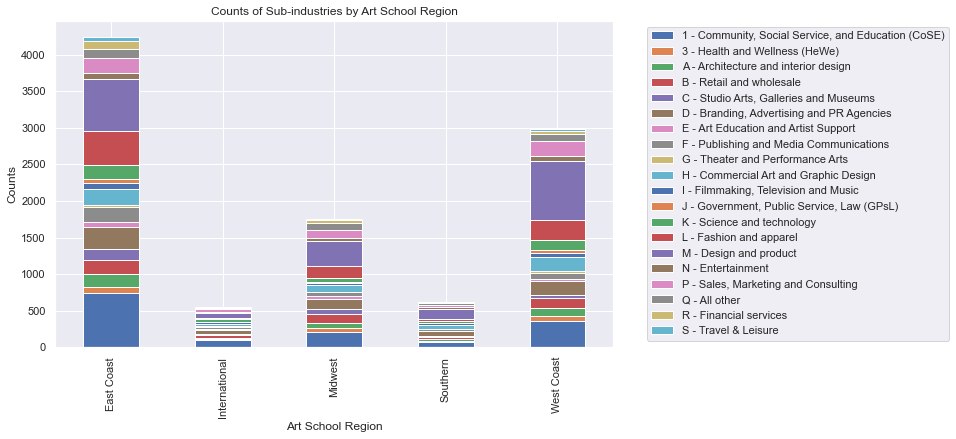

In [107]:
#generating visualizations of Sub-Industry distributions/popularities via Art School Region
import matplotlib.pyplot as plt

# Create the "counts" dataframe
counts = MergeTable.groupby(['Art School Region', 'Sub-industry']).size().reset_index(name='counts')

# Create the "rank" column
counts['rank'] = counts.groupby('Art School Region')['counts'].rank(ascending=False)

# Sort the dataframe by 'Art School Region' and 'rank'
counts.sort_values(['Art School Region', 'rank'], ascending=[True, True], inplace=True)

# Create the grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))
counts.pivot(index='Art School Region', columns='Sub-industry', values='counts').plot(kind='bar', stacked=True, ax=ax)
ax.set_xlabel('Art School Region')
ax.set_ylabel('Counts')
ax.set_title('Counts of Sub-industries by Art School Region')
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.show()


Notes: 20 Sub-industries

Design and product = 20%
CoSE = 15%
Fashion and apparel = 9%
Branding, Advertising and PR Agencies = 7%
Sales, Marketing and Consulting = 6%
Commercial Art and Graphic Design = 6%
Retail and wholesale = 5%
Science and technology = 4%
Publishing and Media Communications = 4%
Architecture and interior design = 4%
All other = 3%
Studio Arts, Galleries and Museums = 3%
Filmmaking, Television and Music = 2%
Health and Wellness = 2%
Entertainment = 2%
Financial services = 2%
Art, Education and Artist Support = 2%
Government, Public Sevice, Law = 1%
Travel & Leisure = 1%
Theatre and Performance Arts = >1%

In [35]:
MergeTable.value_counts('Sub-industry').head(7).sum()/MergeTable.value_counts('Sub-industry').sum()

0.6836564006690937

Top 7 sub-industries each have >5% market share, resulting in 68% of all occupations.

Filtering MergeTable based on the Top 7 industries, creating a seperate database that includes only the industries on the list.

In [36]:
#OK, it seems like the top 7 sub-industries of the dataset should be analyzed further, just a random hypothesis
my_values = ['M - Design and product', '1 - Community, Social Service, and Education (CoSE)', 
             'L - Fashion and apparel', 'D - Branding, Advertising and PR Agencies', 'P - Sales, Marketing and Consulting', 
            'H - Commercial Art and Graphic Design', 'B - Retail and wholesale']
filtered_MergeTable_industry = MergeTable[MergeTable['Sub-industry'].isin(my_values)]

In [37]:
MergeTable.value_counts('Sub-industry')

Sub-industry
M - Design and product                                 2072
1 - Community, Social Service, and Education (CoSE)    1490
L - Fashion and apparel                                 934
D - Branding, Advertising and PR Agencies               761
P - Sales, Marketing and Consulting                     592
H - Commercial Art and Graphic Design                   581
B - Retail and wholesale                                518
K - Science and technology                              449
F - Publishing and Media Communications                 414
A - Architecture and interior design                    399
Q - All other                                           371
C - Studio Arts, Galleries and Museums                  293
I - Filmmaking, Television and Music                    227
3 - Health and Wellness (HeWe)                          215
N - Entertainment                                       215
R - Financial services                                  200
E - Art Education and Artis

In [5]:
industry_city = MergeTable.groupby(['Sub-industry', 'City']).size().reset_index(name='industry_city')

# sort the counts in descending order and keep only the top 10 values for each 'Sub-industry'
top10_industry_city = industry_city.groupby('Sub-industry').apply(lambda x: x.nlargest(10, 'industry_city')).reset_index(drop=True)

top10_industry_city.head(3)

NameError: name 'MergeTable' is not defined

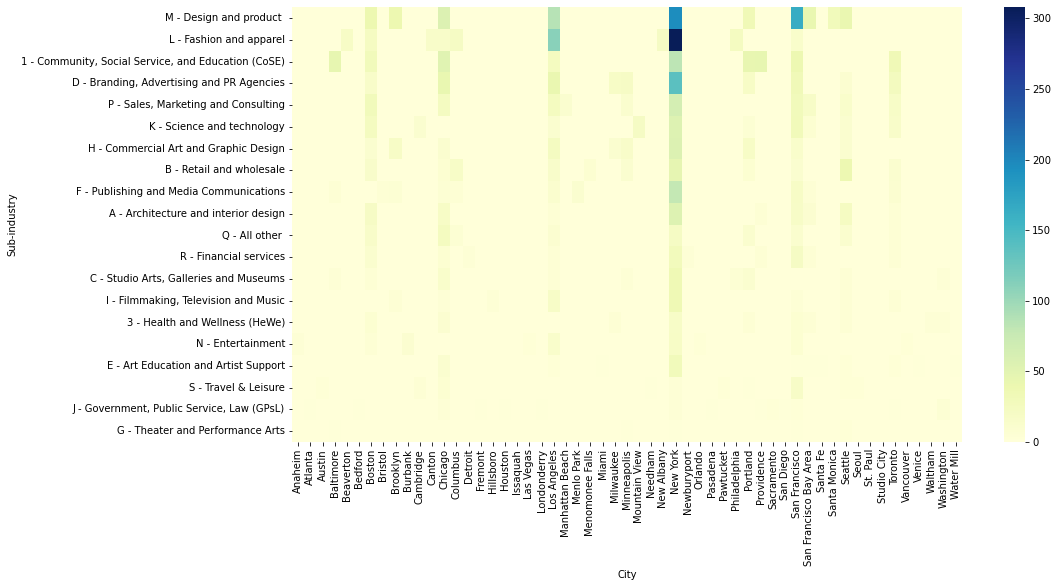

In [39]:
#plotting Sub-industry distribution based on cities

top_cities = MergeTable.groupby(['Sub-industry', 'City']).size().reset_index(name='counts')
top_cities['rank'] = top_cities.groupby('Sub-industry')['counts'].rank(ascending=False)
top_cities = top_cities[top_cities['rank'] <= 10]
top_cities_pivot = top_cities.pivot_table(index='Sub-industry', columns='City', values='counts', fill_value=0)

# Get the top 7 Sub-industries based on counts
top_sub_industries = top_cities.groupby('Sub-industry')['counts'].sum().sort_values(ascending=False).index
top_cities_pivot = top_cities_pivot.loc[top_sub_industries]

# Create the heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(top_cities_pivot, cmap='YlGnBu')

# Show the plot
plt.show()

Notes: Sub-industries seem to be comparatively concentrated on 1-3 big cities, with less than 100 in every other location (which might be big since there are 1320 rows in the entire dataset). 

# Goal 4: What kinds of sub-industries do A&D graduates go into at different points of their career pathways? 

Answering this question can help us understand the big changes an A&D graduate can make throughout their career. Understanding the different career shifts undergraduates can have in their career can make us understand the impact that these industries have. 

<AxesSubplot:xlabel='Chrono Job Order', ylabel='Sub-industry'>

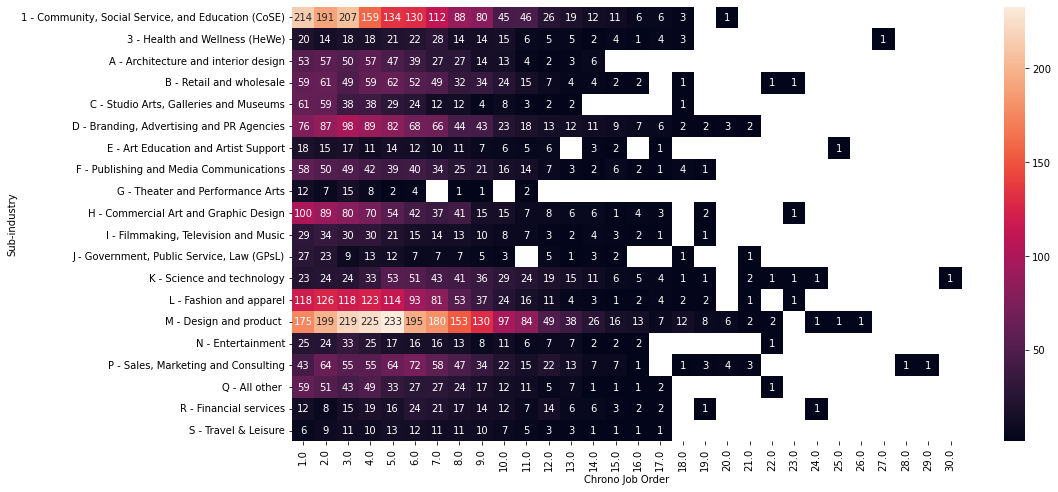

In [30]:
# Group by sub-industry and count the number of rows in each group
top_sub_industry = MergeTable.groupby('Sub-industry').size().reset_index(name='count')

# Group by sub-industry and Chrono Job Order, and count the number of rows in each group
job_order_industry = MergeTable.groupby(['Sub-industry', 'Chrono Job Order']).size().reset_index(name='job_order_industry')

# Filter job_order_industry to include only the sub-industries in top_sub_industry
job_order_industry = job_order_industry[job_order_industry['Sub-industry'].isin(top_sub_industry['Sub-industry'])]

# Pivot the job_order_industry DataFrame so that the Chrono Job Order values become columns, and the values of job_order_industry become the cell values
counts_pivot = job_order_industry.pivot(index='Sub-industry', columns='Chrono Job Order', values='job_order_industry')

# Create a heatmap using seaborn, with counts_pivot as the data, and with annotations showing the actual cell values, using a numeric format for the annotations
plt.figure(figsize=(15, 8))
sns.heatmap(counts_pivot, annot=True, fmt='g')

Notes: Travel and leisure, Financial services, Sales and Marketing/Consulting, Design/product, Science/technology, Branding/Advertising/PR can be categorized as Mid-career industries while other sub-industries are mostly entry-level based

Future Implication: Maybe filter out non-professional jobs (like on-campus positions) from the equation and then re-do this anaysis? 

# Goal 5: Do different AICAD school graduates tend to get into different sub-industries? 

In this analysis, we are trying to find the correlation between number of AICAD graduates and the sub-industries that their graduate have entered in the past or present. This is important because we need to understand if there is a significant difference between school choice and industry choice, since it will impact how the admissions or career offices market themselves. 

<AxesSubplot:xlabel='Sub-industry', ylabel='UnderGrad College'>

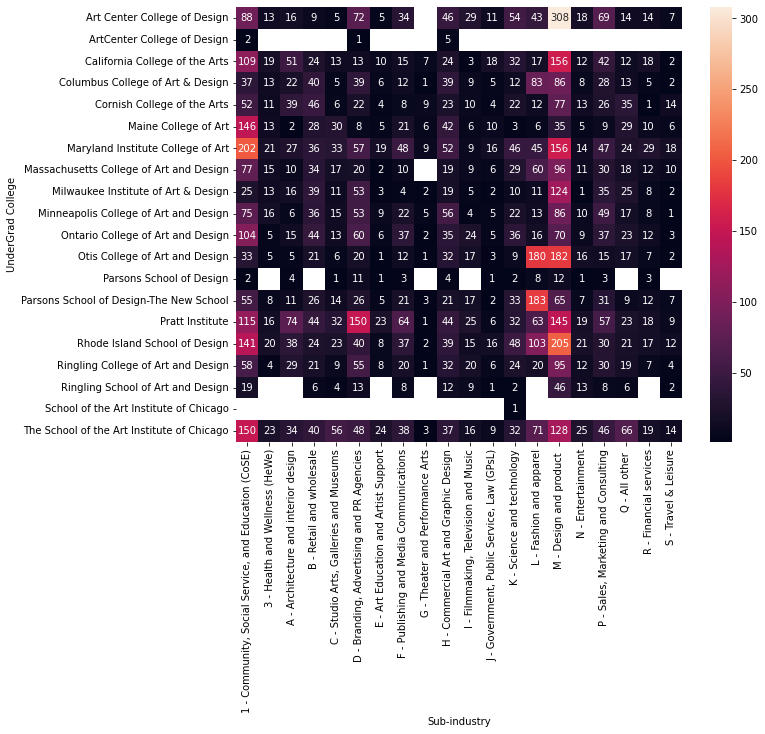

In [33]:
# Group the MergeTable DataFrame by UnderGrad College and Sub-industry columns, and count the number of rows in each group
counts_college = MergeTable.groupby(['UnderGrad College', 'Sub-industry']).size().reset_index(name='counts_college')

# Pivot the counts_college DataFrame so that the Sub-industry values become columns, and the values of counts_college become the cell values
counts_pivot = counts_college.pivot(index='UnderGrad College', columns='Sub-industry', values='counts_college')

# Create a heatmap using seaborn, with counts_pivot as the data, and with annotations showing the actual cell values, using a numeric format for the annotations
plt.figure(figsize=(10, 8))
sns.heatmap(counts_pivot, annot=True, fmt='g')

Notes: There doesn't seem to be any glaring details about the difference of art schools and the sub-industries they tend to go into because all number distributions seem to be the same, on average, for each school. 

# Goal 6: Do different art schools feed into different cities? 

In order to build up on the geographical analysis we pursued, we tried to look at the correlation between cities in job-type columns of MergeTable and correlating them between different schools. I want to find out if a specific school is more likely to go to a specific city, irregardless of the location of their respective schools.

<AxesSubplot:xlabel='City', ylabel='UnderGrad College'>

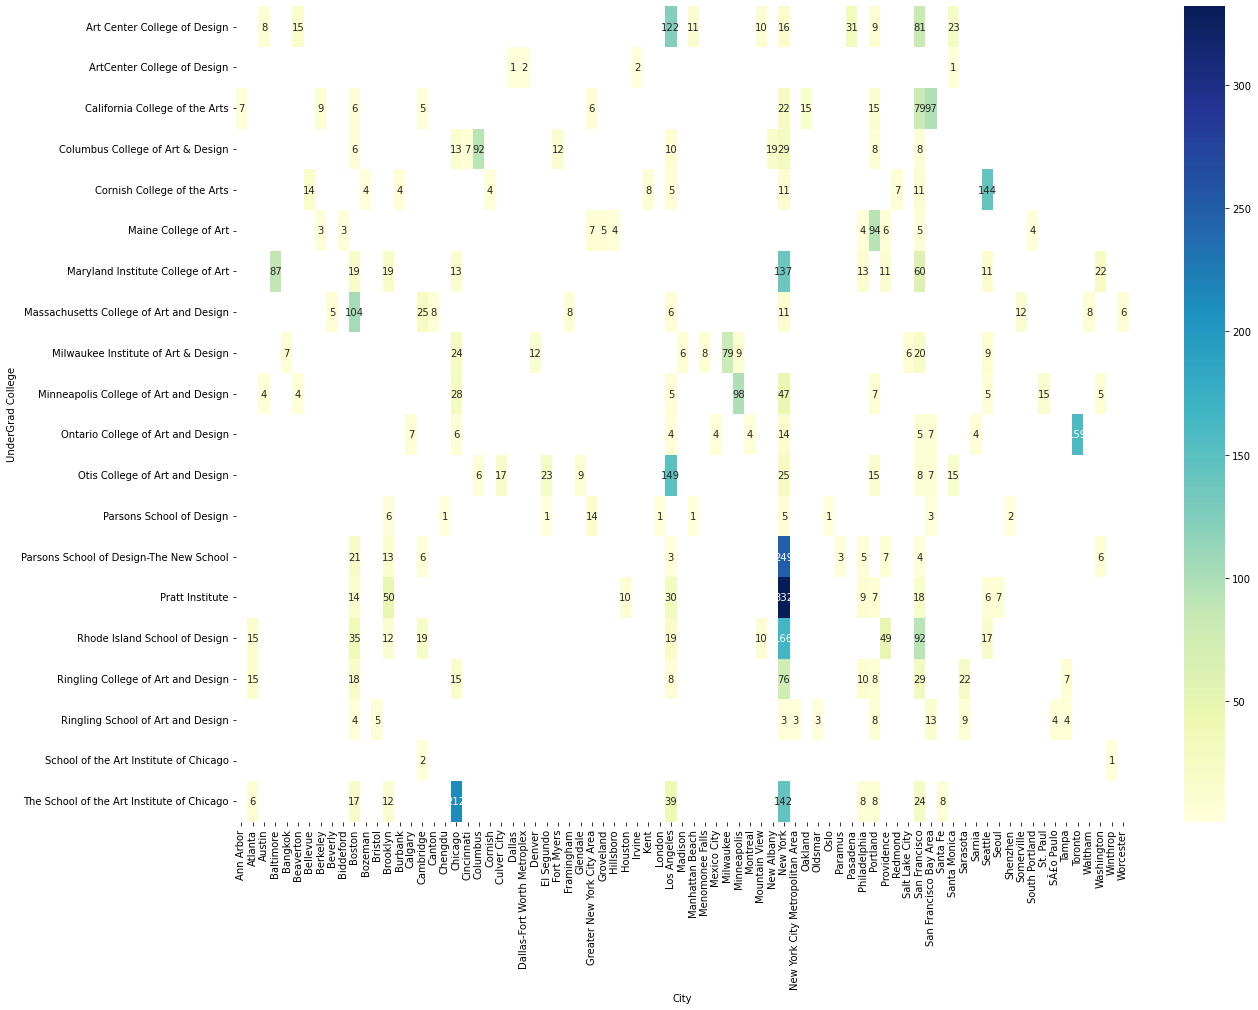

In [37]:
# create a new dataframe containing only the rows where "JoborEdu" column has value "Job"
job_table = MergeTable[MergeTable["JoborEdu"] == "Job"].copy()

# Group the MergeTable DataFrame by UnderGrad College and City columns, and count the number of rows in each group
counts_city_all = job_table.groupby(['UnderGrad College', 'City']).size().reset_index(name='counts_city_all')

# Group the counts_city_all DataFrame by UnderGrad College, and for each group, keep only the top 10 cities with the largest counts of rows
city_top10 = counts_city_all.groupby('UnderGrad College').apply(lambda x: x.nlargest(10, 'counts_city_all')).reset_index(drop=True)

# Pivot the city_top10 DataFrame so that the City values become columns, and the values of counts_city_all become the cell values
heatmap_data = city_top10.pivot(index='UnderGrad College', columns='City', values='counts_city_all')

# Create a heatmap using seaborn, with heatmap_data as the data, and with annotations showing the actual cell values, using a numeric format for the annotations, and using the YlGnBu color palette
plt.figure(figsize=(20, 15))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='g')

Notes: There doesn't seem to be any glaring differences beyond the type of cities different art schools get into because graduates tend to flock into big, popular working cities or the town in which their school is already in. 

In [43]:
#trying to understand the importance of certain sub-industries over another

MergeTable['Sub-industry'].value_counts()
top_7_industries = MergeTable['Sub-industry'].value_counts().nlargest(7).index.tolist()

subset_df = MergeTable[MergeTable['Sub-industry'].isin(top_7_industries)]

#interpretation: 97% of A&D graduates in this dataset have entered the top 7 industries
len(subset_df['Person_ID'].unique())/len(MergeTable['Person_ID'].unique())

0.9716902581182348

# Goal 7: Do optional educational programs (like boot camps, etc.) impact A&D graduates' career pathways?  

In [44]:
subset_df = MergeTable[MergeTable['Normalized Degree'] == 'Professional Development']
#subset_df

#MergeTable[MergeTable['Person_ID'] == 1132]
#subset_df = subset_df['MajorDegreeTitleJob']

#pd.set_option('display.max_colwidth', None)
#print(subset_df)

In [45]:
len(MergeTable[MergeTable['Normalized Degree'] == 'Professional Development'])
len(MergeTable[MergeTable['Normalized Degree'] == 'Certificate'])
len(MergeTable[MergeTable['Normalized Degree'] == 'Boot Camp'])

5

In [46]:
programs_to_check = ['Certificate', 'Associate of Science', 'Professional Development', 'Associate of Arts'
                    , 'Associate of Arts and Sciences', 'Associate ', 'Associate of Applied Science', 'Associate Applied Science', 
                    'Associate of Art and Science', 'Associate of Fine Arts', 'Boot Camp', 'Internship', 'Associate Nursing']
MergeTable['Short Edu Program'] = MergeTable['Normalized Degree'].isin(programs_to_check)

Filtering out certificates and bootcamps, by signalling them True or False depending on the classification and then extracting the number of those columns to return a list of Person_IDs who have columns that classify as "True".

By filtering out list of Person_IDs that has a Certificate or Bootcamp in their list of degrees, we can isolate these Person_IDs and provide cross comparison of their sub-industry outcomes compared to the average

In [47]:
Education['Short Edu'] = Education['Normalized Degree'].apply(lambda x: is_certificate_bootcamp(x))
certificate_bootcamp_id = Education[Education['Short Edu']== True]["PersonID"].unique()
len(certificate_bootcamp_id)

85

Creating a bar graph plotting the proportion of bootcamp/certificate holders in a specific industry compared to the overall number of certificate/bootcamp holders. We are doing this to know the most popular industries that these holders go into

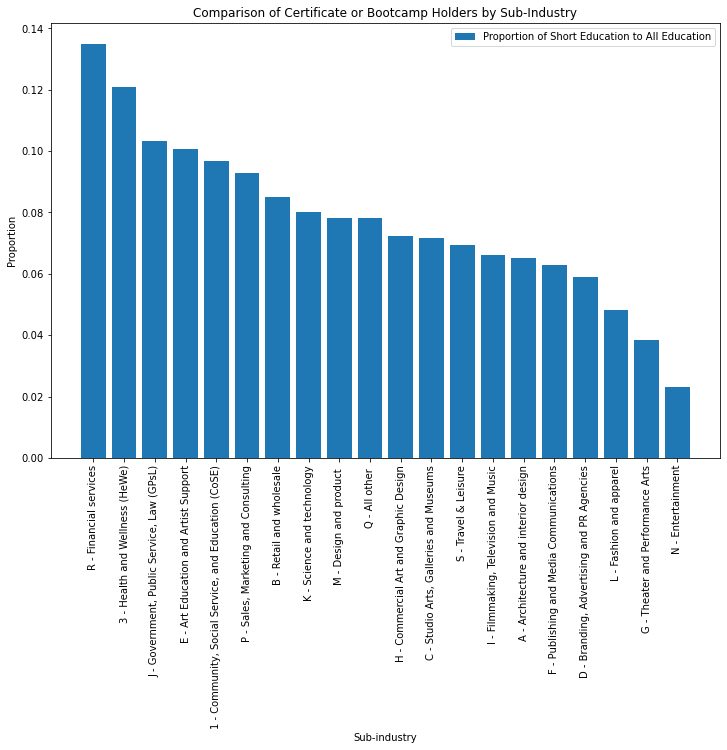

In [48]:
short_edu = MergeTable[MergeTable['Person_ID'].isin(certificate_bootcamp_id)]

import pandas as pd
import matplotlib.pyplot as plt

# Get the counts of education levels for each sub-industry
short_edu_counts = short_edu.groupby('Sub-industry').size()
merge_counts = MergeTable.groupby('Sub-industry').size()

# Calculate the proportion of education levels for each sub-industry
normalized_edu_counts = short_edu_counts / merge_counts

# Convert the result to a dataframe
normalized_edu_counts = normalized_edu_counts.reset_index(name='proportion')
normalized_edu_counts = normalized_edu_counts.sort_values(by='proportion', ascending=False)


# Create the grouped bar chart
plt.figure(figsize=(12, 8))
plt.bar(normalized_edu_counts['Sub-industry'], normalized_edu_counts['proportion'], label='Proportion of Short Education to All Education')
plt.xticks(rotation=90)
plt.xlabel('Sub-industry')
plt.ylabel('Proportion')
plt.title('Comparison of Certificate or Bootcamp Holders by Sub-Industry')
plt.legend()
plt.show()


Now, extending it to Professional Development because I believe it to be within the same group

In [49]:
Education['Short Edu'] = Education['Normalized Degree'].apply(lambda x: is_short_edu(x))
short_edu_id = Education[Education['Short Edu'] == True]['PersonID'].unique()
len(short_edu_id)

153

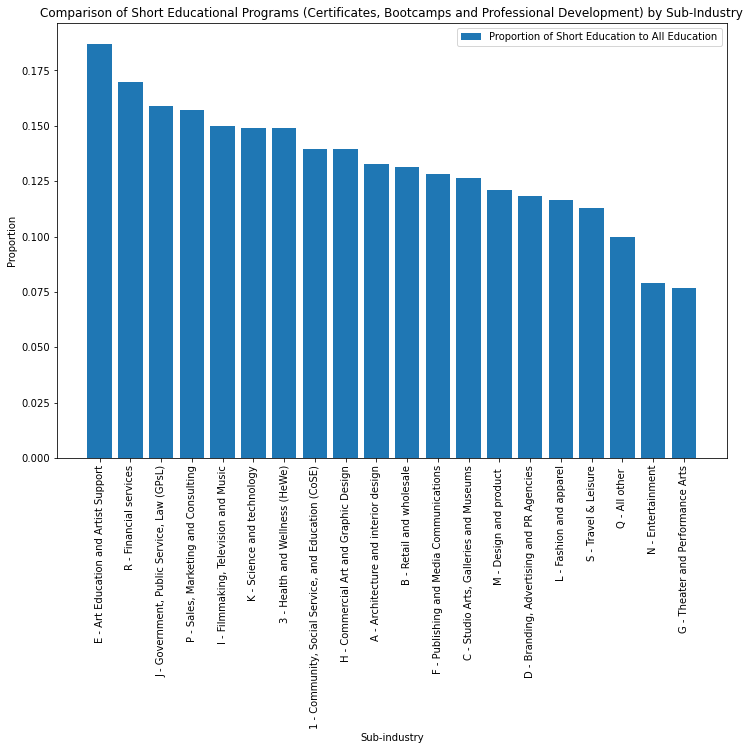

In [50]:
short_edu = MergeTable[MergeTable['Person_ID'].isin(short_edu_id)]

import pandas as pd
import matplotlib.pyplot as plt

# Get the counts of education levels for each sub-industry
short_edu_counts = short_edu.groupby('Sub-industry').size()
merge_counts = MergeTable.groupby('Sub-industry').size()

# Calculate the proportion of education levels for each sub-industry
normalized_edu_counts = short_edu_counts / merge_counts

# Convert the result to a dataframe
normalized_edu_counts = normalized_edu_counts.reset_index(name='proportion')
normalized_edu_counts = normalized_edu_counts.sort_values(by='proportion', ascending=False)


# Create the grouped bar chart
plt.figure(figsize=(12, 8))
plt.bar(normalized_edu_counts['Sub-industry'], normalized_edu_counts['proportion'], label='Proportion of Short Education to All Education')
plt.xticks(rotation=90)
plt.xlabel('Sub-industry')
plt.ylabel('Proportion')
plt.title('Comparison of Short Educational Programs (Certificates, Bootcamps and Professional Development) by Sub-Industry')
plt.legend()
plt.show()

In [52]:
MergeTable = add_short_edu_program_column(MergeTable)
short_edu = MergeTable[MergeTable['Short Edu Program'] == True]
unique_id_short_edu = short_edu["Person_ID"].unique()
general_id = MergeTable['Person_ID'].unique()
len(unique_id_short_edu)/len(general_id)

0.12489592006661115

Note: Around 12% of our A&D scholars pursue a short educational program on top of an A&D graduate degree, and those graduates tend to go into far different sub-industries like Art Education/Artist Support, Financial services, Government/Public Service/Law and Filmmaking than the average graduate in MergeTable

# Goal 8: Does an Associate's degree impact A&D graduates' career pathways?  

Next, we will try to analyze the impact of other educational degrees, like Associates (which is much more common for A&D graduates to have compared to other majors) and how it impacts the industries of their careers.

In [53]:
# Create a new column in the Education DataFrame called 'Associate', that contains True for degrees that contain 'Associate ' and False otherwise, using the is_associate function and the apply method
Education['Associate'] = Education['Normalized Degree'].apply(is_associate)

# Filter the Education DataFrame to only include rows where the 'Associate' column is True
associate_id = Education[Education['Associate'] == True]

# Extract the unique PersonIDs from the filtered DataFrame and assign them to associate_id
associate_id = associate_id['PersonID'].unique()

# Calculate the ratio of PersonIDs with associate degrees to all PersonIDs in the general_id dataset
len(associate_id) / len(general_id)

0.054954204829308906

In [54]:
len(associate_id)

66

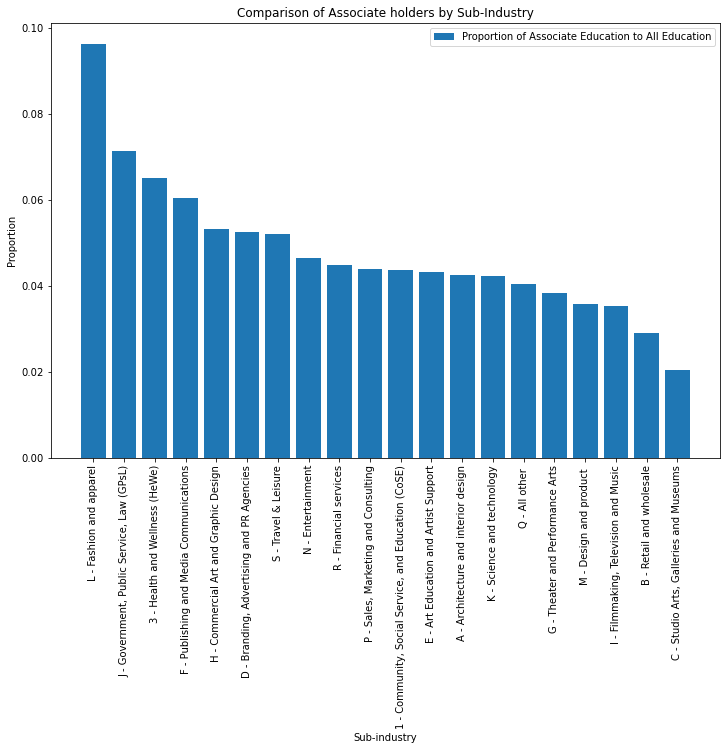

In [55]:
short_edu = MergeTable[MergeTable['Person_ID'].isin(associate_id)]

import pandas as pd
import matplotlib.pyplot as plt

# Get the counts of education levels for each sub-industry
short_edu_counts = short_edu.groupby('Sub-industry').size()
merge_counts = MergeTable.groupby('Sub-industry').size()

# Calculate the proportion of education levels for each sub-industry
normalized_edu_counts = short_edu_counts / merge_counts

# Convert the result to a dataframe
normalized_edu_counts = normalized_edu_counts.reset_index(name='proportion')
normalized_edu_counts = normalized_edu_counts.sort_values(by='proportion', ascending=False)


# Create the grouped bar chart
plt.figure(figsize=(12, 8))
plt.bar(normalized_edu_counts['Sub-industry'], normalized_edu_counts['proportion'], label='Proportion of Associate Education to All Education')
plt.xticks(rotation=90)
plt.xlabel('Sub-industry')
plt.ylabel('Proportion')
plt.title('Comparison of Associate holders by Sub-Industry')
plt.legend()
plt.show()

Notes: Around 10% of associate holders go into the Fashion industry, which is already a top industry for graduates in general but a very high proportion of associate holders tend to pursue that role. Another industry that might not be popular is Publishing and Media Communications as well as Health and Wellness.

# Goal 9: Does having a Master's degree impact what type of careers A&D graduates go into? 

In [40]:
# Create a new column in the Education DataFrame called 'Masters', that contains True for degrees that contain 'Master ', 'MBA', or 'Doctor', and False otherwise, using the is_master function and the apply method
Education['Masters'] = Education['Normalized Degree'].apply(is_master)

# Filter the Education DataFrame to only include rows where the 'Masters' column is True
master_id = Education[Education['Masters'] == True]

# Extract the unique PersonIDs from the filtered DataFrame and assign them to master_id
master_id = master_id['PersonID'].unique()

# Calculate the ratio of PersonIDs with master degrees to all PersonIDs in the general_id dataset
len(master_id) / len(general_id)

Notes: Around 27% of A&D graduates pursued higher education than a Bachelor's.

Converting the proportion of Associate degree holders to see where the majority of these degree holders go into which industries: 

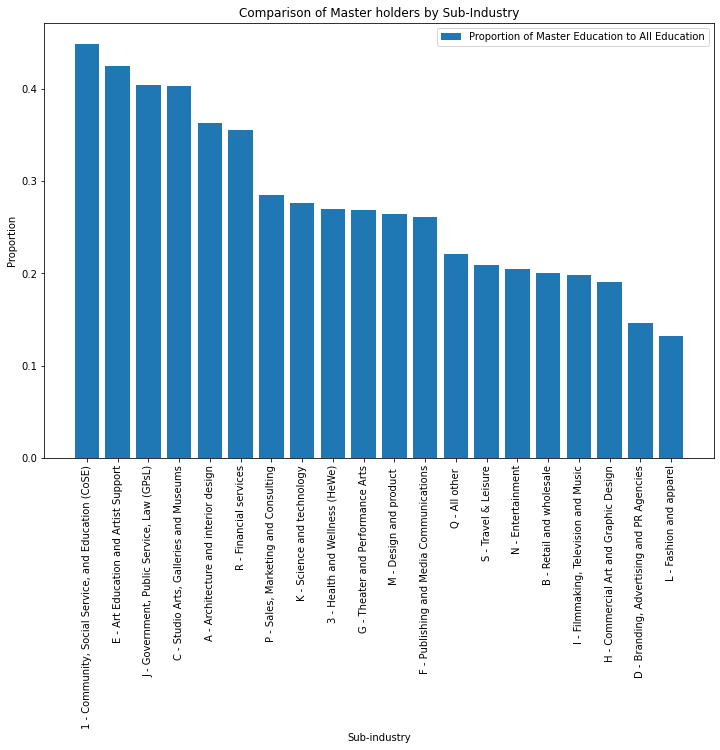

In [57]:
short_edu = MergeTable[MergeTable['Person_ID'].isin(master_id)]

import pandas as pd
import matplotlib.pyplot as plt

# Get the counts of education levels for each sub-industry
short_edu_counts = short_edu.groupby('Sub-industry').size()
merge_counts = MergeTable.groupby('Sub-industry').size()

# Calculate the proportion of education levels for each sub-industry
normalized_edu_counts = short_edu_counts / merge_counts

# Convert the result to a dataframe
normalized_edu_counts = normalized_edu_counts.reset_index(name='proportion')
normalized_edu_counts = normalized_edu_counts.sort_values(by='proportion', ascending=False)


# Create the grouped bar chart
plt.figure(figsize=(12, 8))
plt.bar(normalized_edu_counts['Sub-industry'], normalized_edu_counts['proportion'], label='Proportion of Master Education to All Education')
plt.xticks(rotation=90)
plt.xlabel('Sub-industry')
plt.ylabel('Proportion')
plt.title('Comparison of Master holders by Sub-Industry')
plt.legend()
plt.show()

# Goal 10: Does removing jobs before graduation make a statistically significant difference in the career trajectory of A&D graduates? 

By focusing on Jobs After Graduation within the MergeTable dataset, I will try to see if there are any cross-comparative differences in their career trajectory. In other words, I want to see if including jobs before graduation has a big impact and if excluding that will lead to significantly more accurate results of their career and the industries they become involved in.

In [12]:
MergeTable_After = MergeTable.loc[MergeTable['Job Post Graduation'] == 'After']

#standardize all college names
MergeTable_After.loc[MergeTable['UnderGrad College'] == 'Ringling School of Art and Design', 'UnderGrad College'] = 'Ringling College of Art and Design'
MergeTable_After.loc[MergeTable['UnderGrad College'] == 'Parsons School of Design-The New School', 'UnderGrad College'] = 'Parsons School of Design'
MergeTable_After.loc[MergeTable['UnderGrad College'] == 'Art Center College of Design', 'UnderGrad College'] = 'ArtCenter College of Design'
MergeTable_After.loc[MergeTable['UnderGrad College'] == 'The School of the Art Institute of Chicago', 'UnderGrad College'] = 'School of the Art Institute of Chicago'

MergeTable_After['Art School Region'] = MergeTable_After['UnderGrad College'].apply(categorize_words)



/var/folders/sm/fz73rn296778qvwdnp7bb22m0000gn/T/ipykernel_7352/2842866599.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MergeTable_After['Art School Region'] = MergeTable_After['UnderGrad College'].apply(categorize_words)


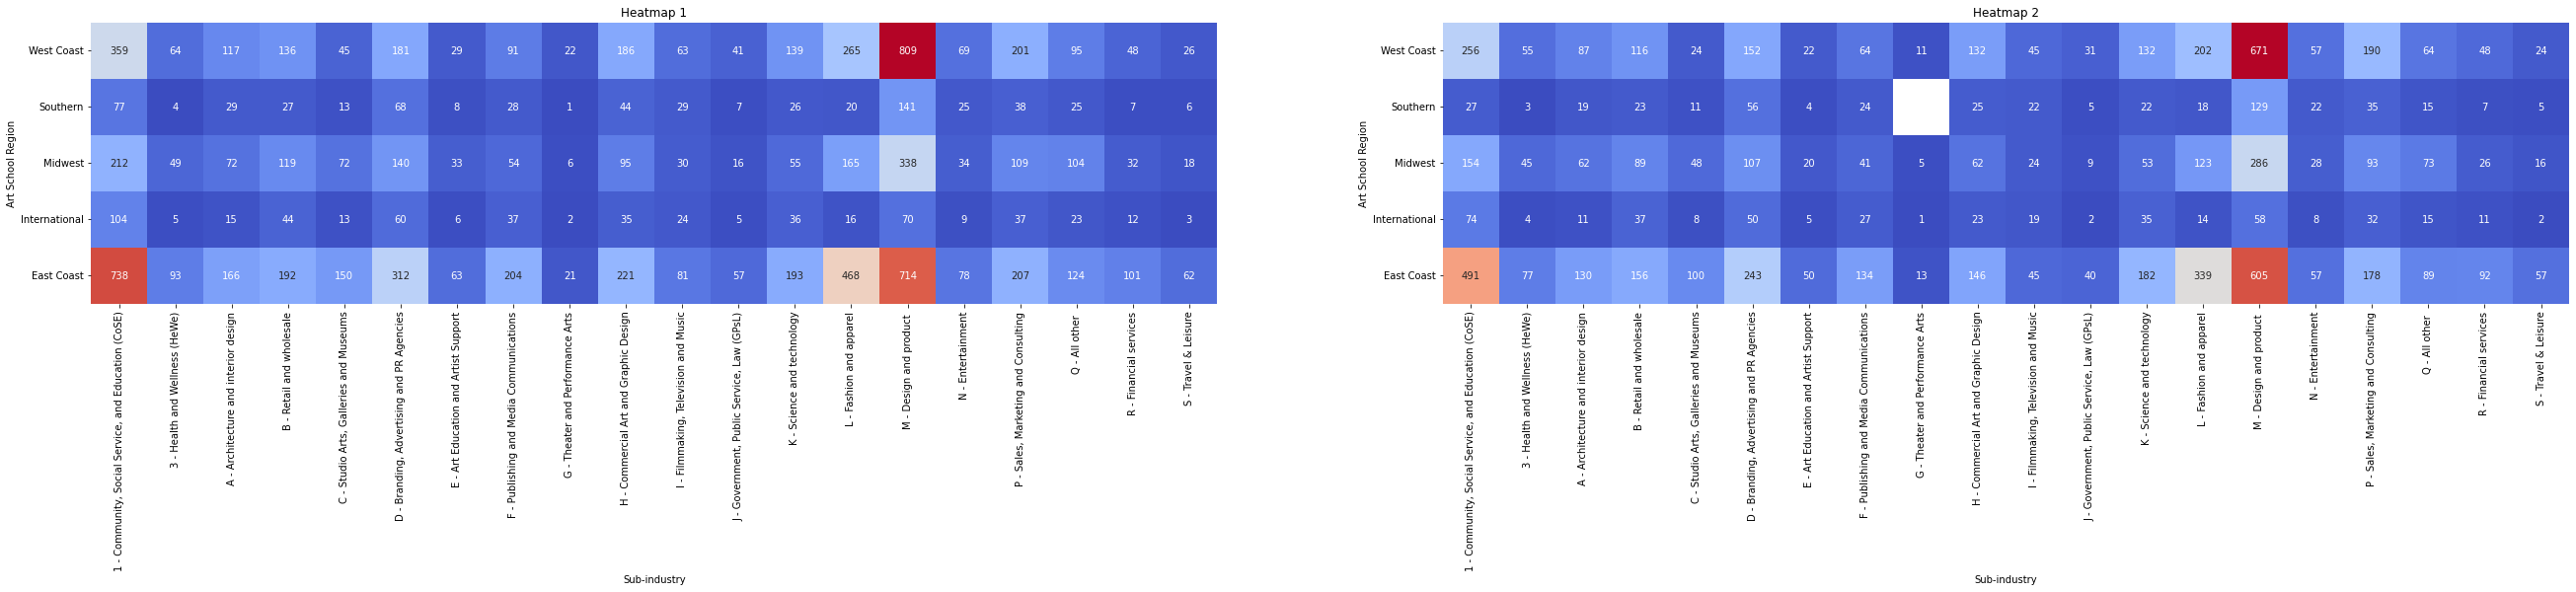

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(45, 11))

counts = MergeTable.groupby(['Art School Region', 'Sub-industry']).size().reset_index(name='counts')

# Create a pivot table to reshape the data
counts_pivot = counts.pivot(index='Art School Region', columns='Sub-industry', values='counts')

counts1 = MergeTable_After.groupby(['Art School Region', 'Sub-industry']).size().reset_index(name='counts1')

# Create a pivot table to reshape the data
counts_pivot1 = counts1.pivot(index='Art School Region', columns='Sub-industry', values='counts1')

# Plot heatmaps side-by-side
axs[0].set_title('Heatmap 1')
axs[0].set_aspect('equal')
sns.heatmap(counts_pivot, ax=axs[0], cmap='coolwarm', cbar=False, annot=True, fmt='g')

axs[1].set_title('Heatmap 2')
axs[1].set_aspect('equal')
sns.heatmap(counts_pivot1, ax=axs[1], cmap='coolwarm', cbar=False, annot=True, fmt='g')

# Set size of each heatmap axes
axs[0].set_xlim(0, len(counts_pivot.columns))
axs[0].set_ylim(0, len(counts_pivot.index))

axs[1].set_xlim(0, len(counts_pivot1.columns))
axs[1].set_ylim(0, len(counts_pivot1.index))

# Show plot
plt.show()

Notes: For CoSE industry, the number of jobs fell down dramatically when taking into account only jobs post graduation. In particular, only Southern and East coast occupations have dramatic color differences while other regions stayed fairly the same. For Fashion and apparel, there is a dramatic color difference for occupations within the East Coast. Other than that, the color distributions stayed fairly the same. 
    
This goes to show that CoSE industry is fairly populated with on-campus and college jobs, most particularly within the East Coast and the South (since alot of people in their region migrate out of that after graduation). In the Eas Coast, alot of art students also go into Fashion and apparel jobs when they were in school, telling me that it is a poplar field for current students with a thriving fashion environment.

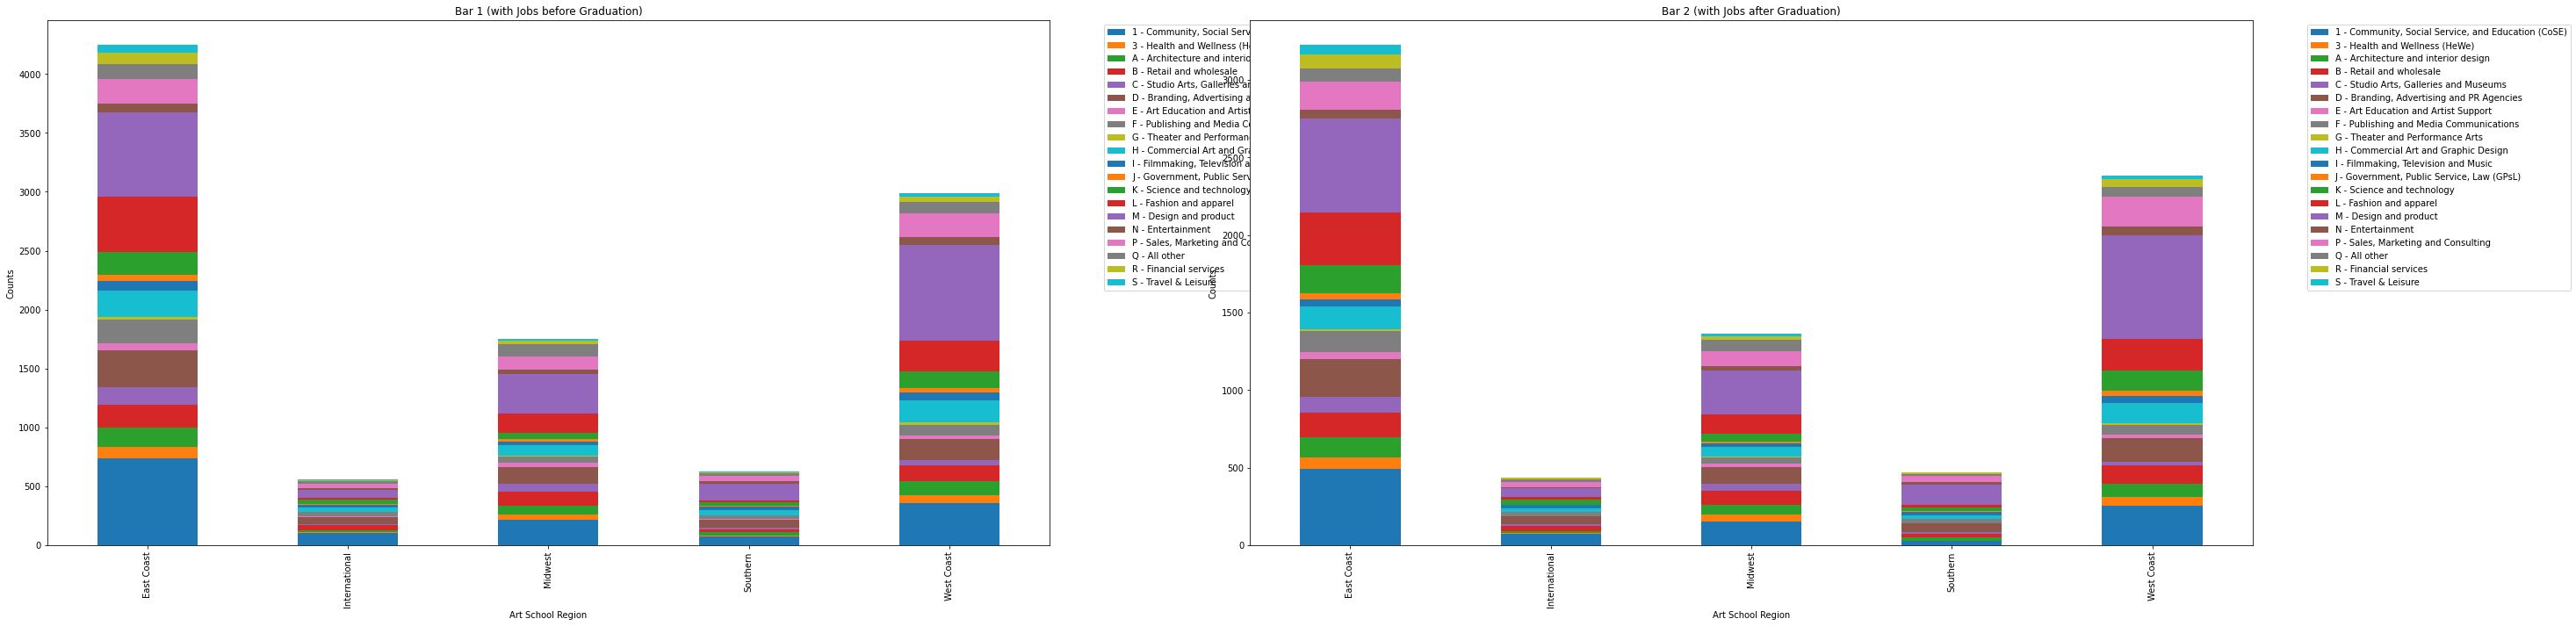

In [14]:
#generating visualizations of Sub-Industry distributions/popularities via Art School Region
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(45, 11))

# Create the "counts" dataframe
counts = MergeTable.groupby(['Art School Region', 'Sub-industry']).size().reset_index(name='counts')

# Create the "rank" column
counts['rank'] = counts.groupby('Art School Region')['counts'].rank(ascending=False)

# Sort the dataframe by 'Art School Region' and 'rank'
counts.sort_values(['Art School Region', 'rank'], ascending=[True, True], inplace=True)

counts_pivot = counts.pivot(index='Art School Region', columns='Sub-industry', values='counts').plot(kind='bar', stacked=True, ax=axs[0])

counts1 = MergeTable_After.groupby(['Art School Region', 'Sub-industry']).size().reset_index(name='counts')

counts1['rank'] = counts1.groupby('Art School Region')['counts'].rank(ascending=False)

counts1.sort_values(['Art School Region', 'rank'], ascending=[True, True], inplace=True)

counts_pivot1 = counts1.pivot(index='Art School Region', columns='Sub-industry', values='counts').plot(kind='bar', stacked=True, ax=axs[1])


# Create the grouped bar chart
axs[0].set_title('Bar 1 (with Jobs before Graduation)')
axs[0].set_xlabel('Art School Region')
axs[0].set_ylabel('Counts')
#axs[0].set_aspect('equal')
axs[0].legend(loc='upper left', bbox_to_anchor=(1.05, 1))

axs[1].set_title('Bar 2 (with Jobs after Graduation)')
axs[1].set_xlabel('Art School Region')
axs[1].set_ylabel('Counts')
#axs[1].set_aspect('equal')
axs[1].legend(loc='upper left', bbox_to_anchor=(1.05, 1))

# Show plot
plt.show()

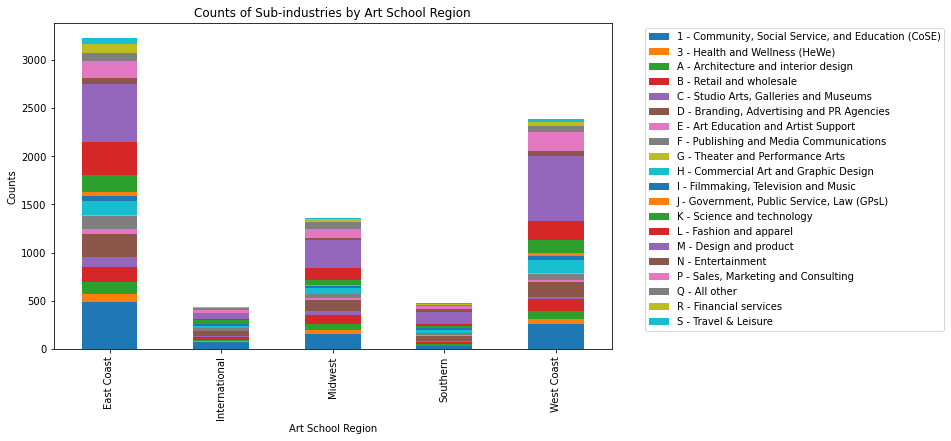

In [20]:
#rechecking graph distribution by itself

#generating visualizations of Sub-Industry distributions/popularities via Art School Region
import matplotlib.pyplot as plt

# Create the "counts" dataframe
counts2 = MergeTable_After.groupby(['Art School Region', 'Sub-industry']).size().reset_index(name='counts2')

# Create the "rank" column
counts2['rank'] = counts2.groupby('Art School Region')['counts2'].rank(ascending=False)

# Sort the dataframe by 'Art School Region' and 'rank'
counts2.sort_values(['Art School Region', 'rank'], ascending=[True, True], inplace=True)

# Create the grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))
counts2.pivot(index='Art School Region', columns='Sub-industry', values='counts2').plot(kind='bar', stacked=True, ax=ax)
ax.set_xlabel('Art School Region')
ax.set_ylabel('Counts')
ax.set_title('Counts of Sub-industries by Art School Region')
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.show()



Notes: It seems like jobs before/after doesn't have any statistically significant difference within distribution of sub-industries. (**Will have to corroborate the details through t-tests etc.)

In [111]:
#removing terminal degrees (only including Master's and Bachelor's)

MergeTable_nonTerminal = MergeTable[MergeTable["Normalized Degree"].str.contains("Doctor") == False]
MergeTable['Normalized Degree'].unique()

#isolating out non-Masters MergeTable
MergeTable_nonMaster = MergeTable_nonTerminal[MergeTable_nonTerminal["Normalized Degree"].str.contains("Master|MBA") == False]

# Goal 11: Are certain majors more likely to go into certain roles and certain sub-industries? Is there a significant difference overall? 

First, we will have to isolate the graduates within the dataset based on their majors and then I will try to see if we can isolate any frequencies that certain majors have for certain industries and career communities. I am trying to order this via Post Undergrad Job Order so I can see how the differences in industry and career communities between different majors occur throughout their career. 

In [14]:
#Dividing EduMajorList into different types of majors:
GraphicDesignList = set(EduMajorList['Graphic Design'].iloc[2:].dropna().astype(int))
FineArtsList = set(EduMajorList['Fine Arts'].iloc[2:].dropna().astype(int))
ProductIndustrialDesignList = set(EduMajorList['Product / Industrial Design'].iloc[2:].dropna().astype(int))
DigitalArtsList = set(EduMajorList['Digital Arts'].iloc[2:].dropna().astype(int))
FashionDesignList = set(EduMajorList['Fashion Design'].iloc[2:].dropna().astype(int))
ArchitectureList = set(EduMajorList['Architecture'].iloc[2:].dropna().astype(int))
IllustrationList = set(EduMajorList['Illustration'].iloc[2:].dropna().astype(int))
PhotographyList = set(EduMajorList['Photography'].iloc[2:].dropna().astype(int))

### Graphic Design Majors

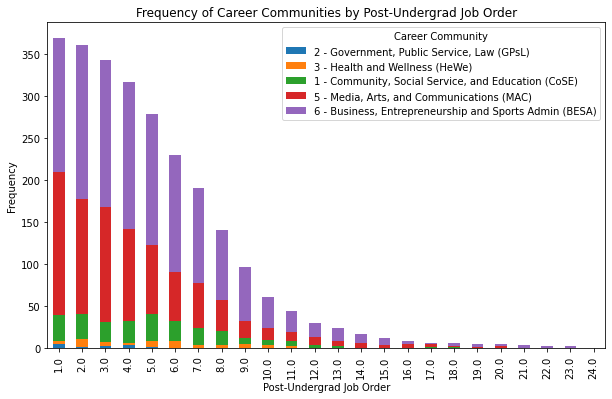

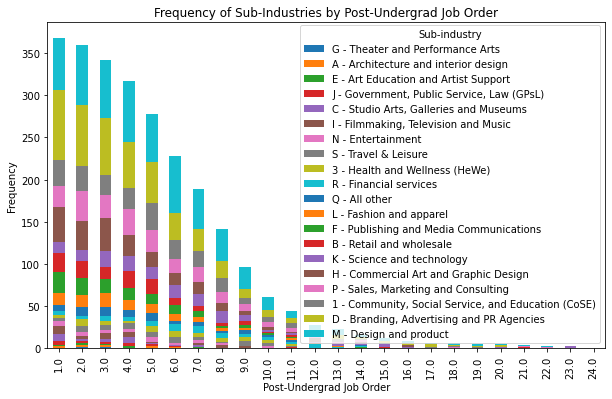

In [173]:
community_industry_by_major(GraphicDesignList)

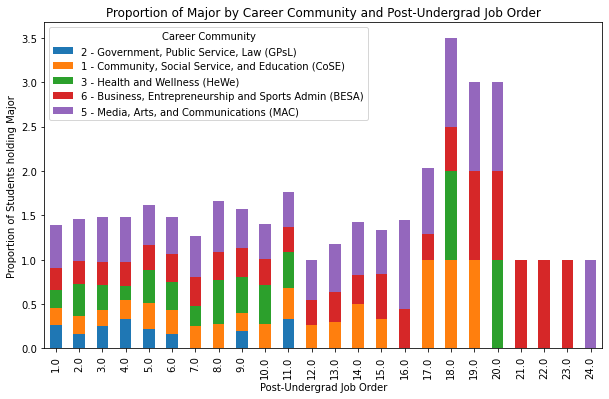

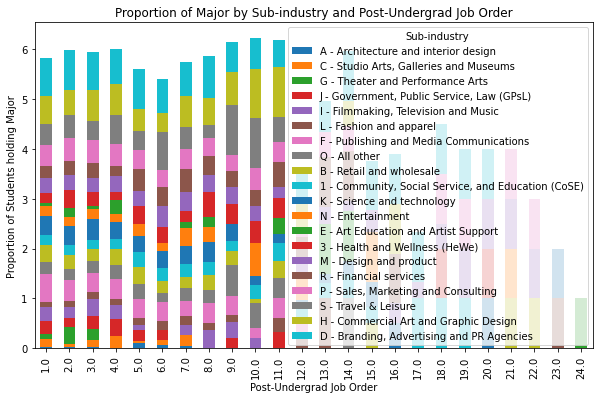


Sub-industry Proportions:
Sub-industry              A - Architecture and interior design  \
Post Undergrad Job Order                                         
1.0                                                   0.034483   
2.0                                                   0.036364   
3.0                                                   0.037736   
4.0                                                        NaN   
5.0                                                   0.100000   
6.0                                                   0.068966   
7.0                                                   0.055556   
8.0                                                        NaN   
9.0                                                        NaN   
10.0                                                       NaN   
11.0                                                       NaN   
12.0                                                       NaN   
13.0                                             

In [15]:
graphic_design = add_major_column(MergeTable, GraphicDesignList)

# Call the function with your DataFrame
result_career_community, result_sub_industry = plot_proportion_major_by_career_community(graphic_design)

# Print the resulting DataFrames of proportions
print("\nSub-industry Proportions:")
print(result_sub_industry)

### Fine Arts Major 

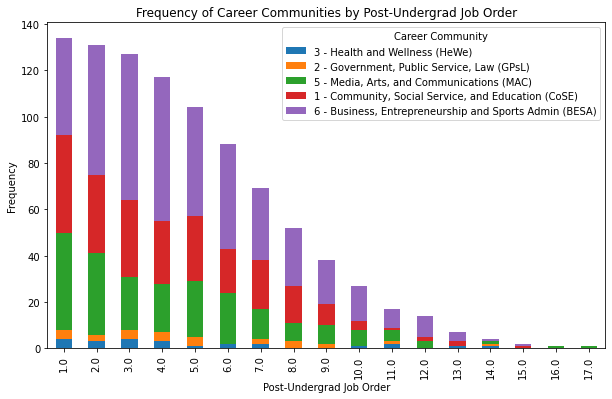

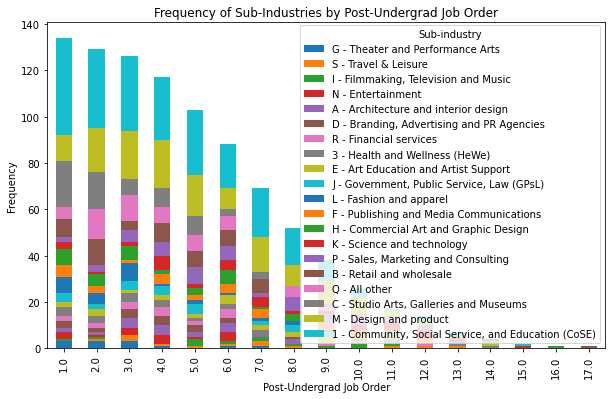

In [168]:
community_industry_by_major(FineArtsList)

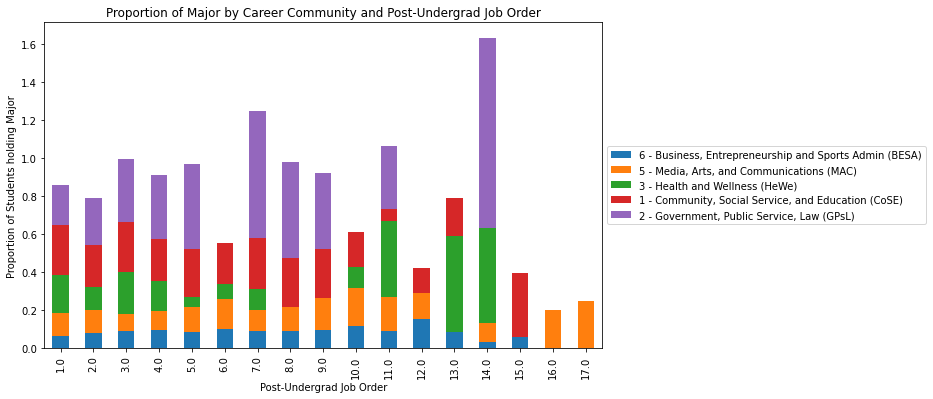

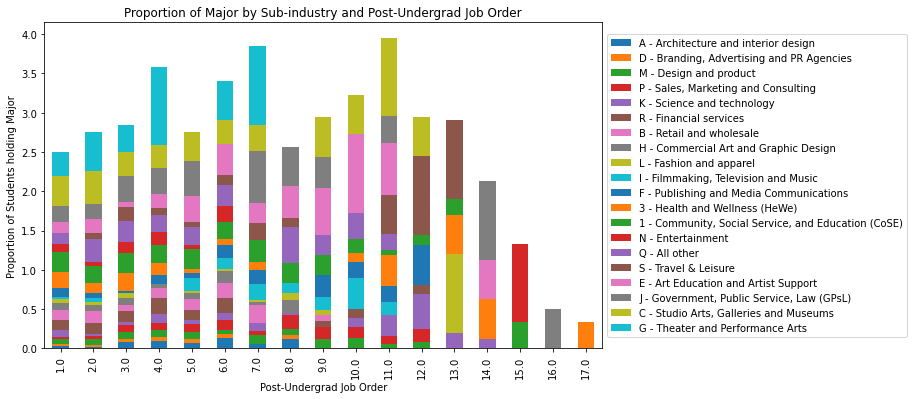


Sub-industry Proportions:
Sub-industry              A - Architecture and interior design  \
Post Undergrad Job Order                                         
1.0                                                   0.034483   
2.0                                                   0.018182   
3.0                                                   0.075472   
4.0                                                   0.093023   
5.0                                                   0.066667   
6.0                                                   0.137931   
7.0                                                   0.055556   
8.0                                                   0.125000   
9.0                                                        NaN   
10.0                                                       NaN   
11.0                                                       NaN   
12.0                                                       NaN   
13.0                                             

In [170]:
fine_arts = add_major_column(MergeTable, FineArtsList)

# Call the function with your DataFrame
result_career_community, result_sub_industry = plot_proportion_major_by_career_community(fine_arts)

# Print the resulting DataFrames of proportions
print("\nSub-industry Proportions:")
print(result_sub_industry)

### Product Industrial Design List

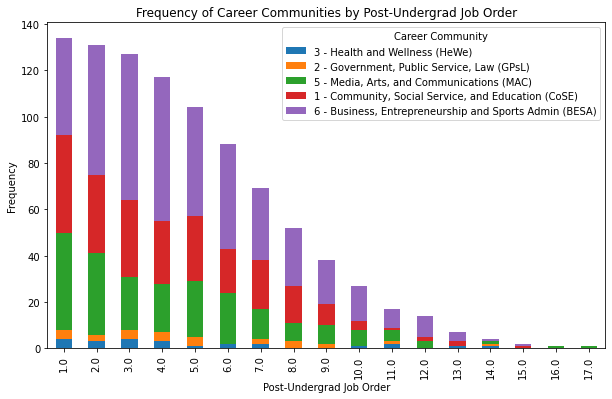

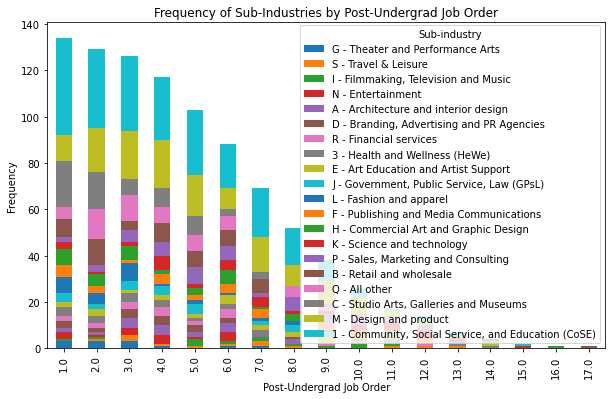

In [175]:
community_industry_by_major(FineArtsList)

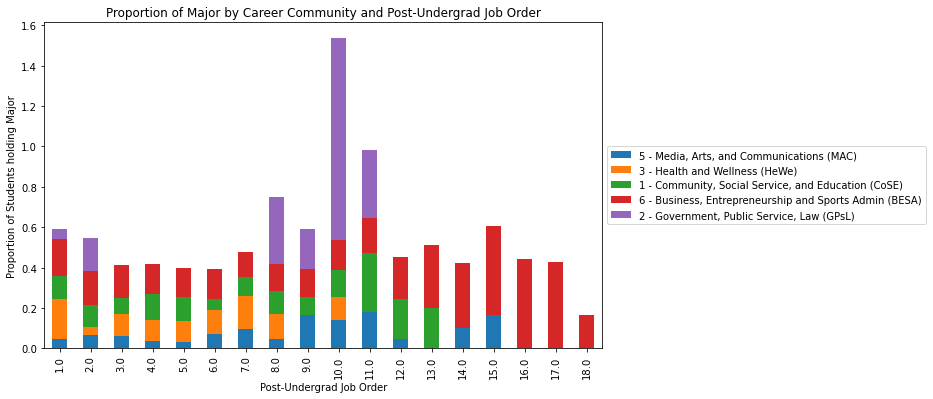

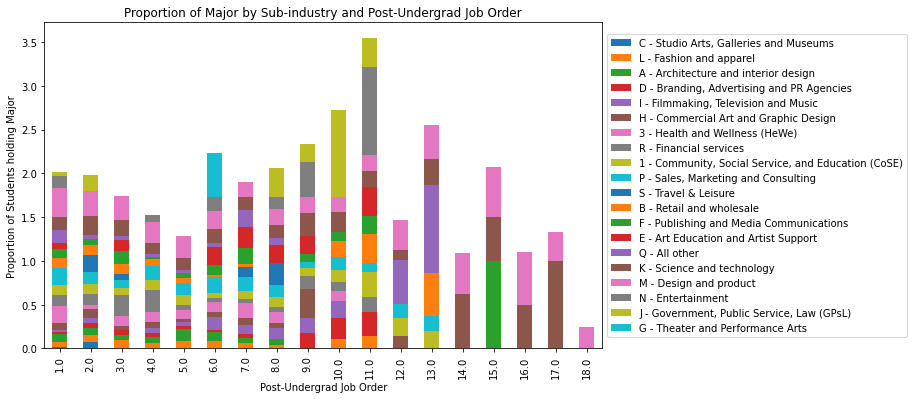


Sub-industry Proportions:
Sub-industry              C - Studio Arts, Galleries and Museums  \
Post Undergrad Job Order                                           
1.0                                                     0.019231   
2.0                                                     0.078947   
3.0                                                          NaN   
4.0                                                          NaN   
5.0                                                          NaN   
6.0                                                          NaN   
7.0                                                          NaN   
8.0                                                          NaN   
9.0                                                          NaN   
10.0                                                         NaN   
11.0                                                         NaN   
12.0                                                         NaN   
13.0                 

In [176]:
product_design = add_major_column(MergeTable, ProductIndustrialDesignList)

# Call the function with your DataFrame
result_career_community, result_sub_industry = plot_proportion_major_by_career_community(product_design)

# Print the resulting DataFrames of proportions
print("\nSub-industry Proportions:")
print(result_sub_industry)

### Digital Arts Majors

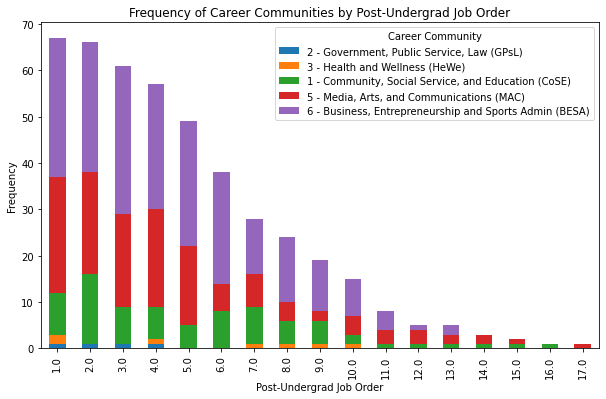

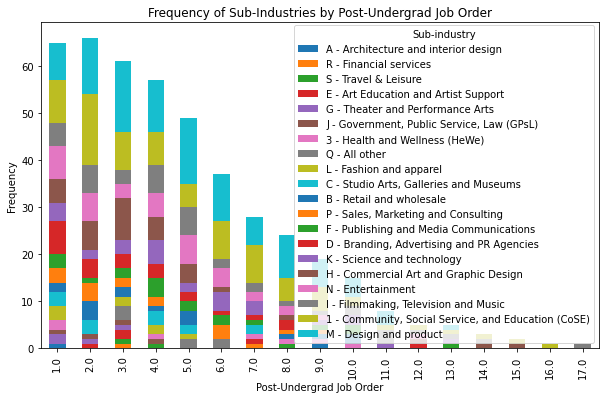

In [177]:
community_industry_by_major(DigitalArtsList)

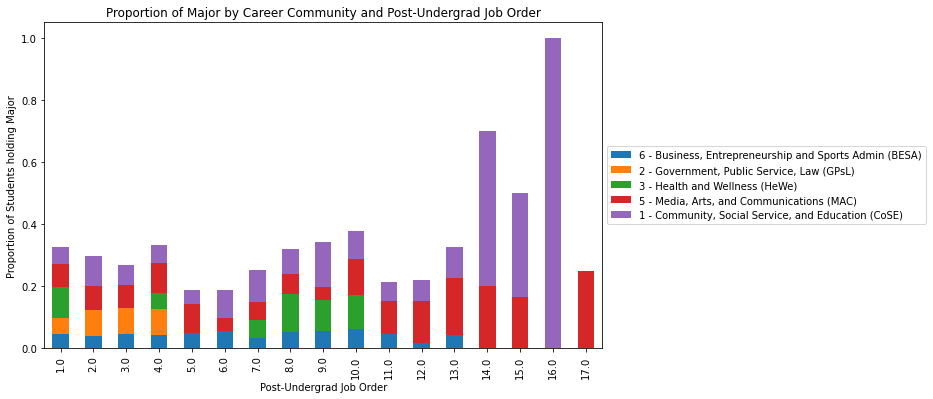

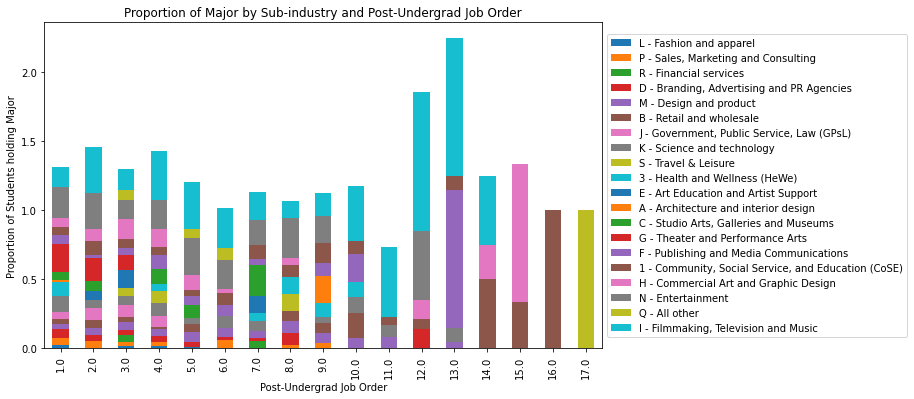


Sub-industry Proportions:
Sub-industry              L - Fashion and apparel  \
Post Undergrad Job Order                            
1.0                                      0.021898   
2.0                                           NaN   
3.0                                      0.016000   
4.0                                      0.020619   
5.0                                      0.012195   
6.0                                           NaN   
7.0                                           NaN   
8.0                                           NaN   
9.0                                           NaN   
10.0                                          NaN   
11.0                                          NaN   
12.0                                          NaN   
13.0                                          NaN   
14.0                                          NaN   
15.0                                          NaN   
16.0                                          NaN   
17.0               

In [178]:
digital_arts = add_major_column(MergeTable, DigitalArtsList)

# Call the function with your DataFrame
result_career_community, result_sub_industry = plot_proportion_major_by_career_community(digital_arts)

# Print the resulting DataFrames of proportions
print("\nSub-industry Proportions:")
print(result_sub_industry)

### Fashion Design Major

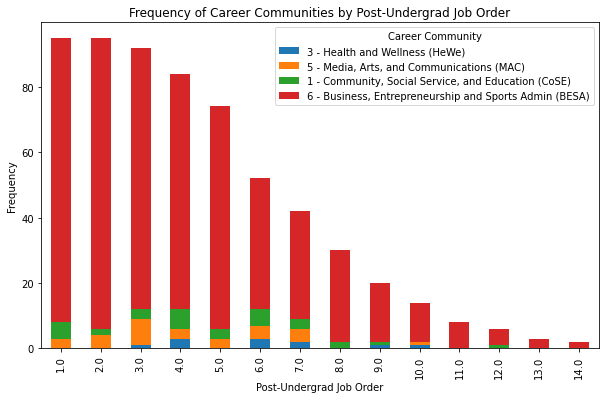

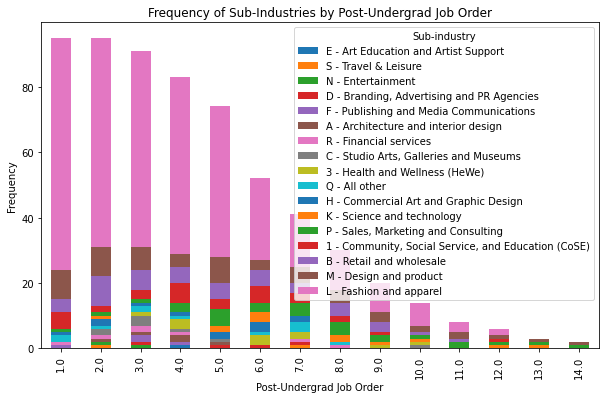

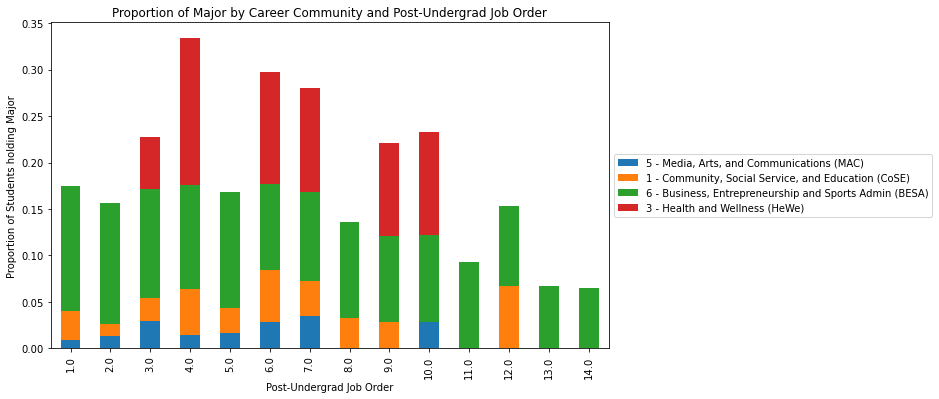

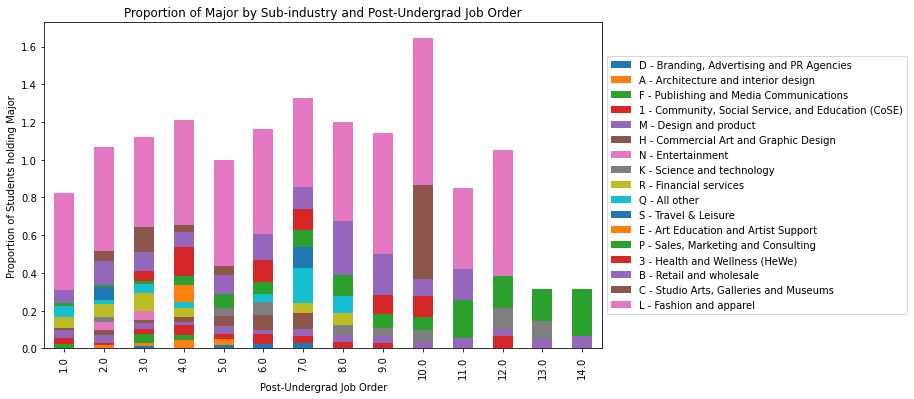


Sub-industry Proportions:
Sub-industry              D - Branding, Advertising and PR Agencies  \
Post Undergrad Job Order                                              
1.0                                                             NaN   
2.0                                                             NaN   
3.0                                                        0.010989   
4.0                                                             NaN   
5.0                                                        0.016393   
6.0                                                        0.021277   
7.0                                                        0.026316   
8.0                                                             NaN   
9.0                                                             NaN   
10.0                                                            NaN   
11.0                                                            NaN   
12.0                                              

In [181]:
community_industry_by_major(FashionDesignList)
fashion_design = add_major_column(MergeTable, FashionDesignList)

# Call the function with your DataFrame
result_career_community, result_sub_industry = plot_proportion_major_by_career_community(fashion_design)

# Print the resulting DataFrames of proportions
print("\nSub-industry Proportions:")
print(result_sub_industry)

### Architecture List

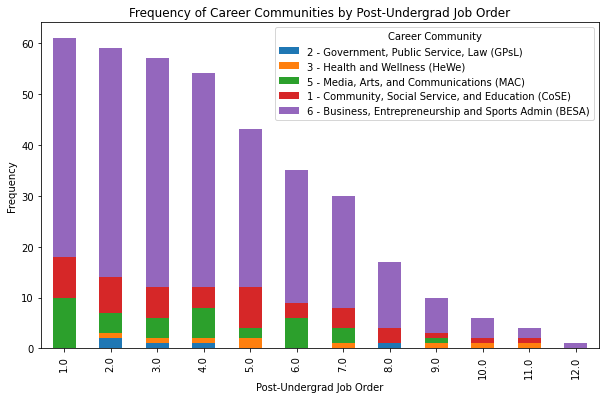

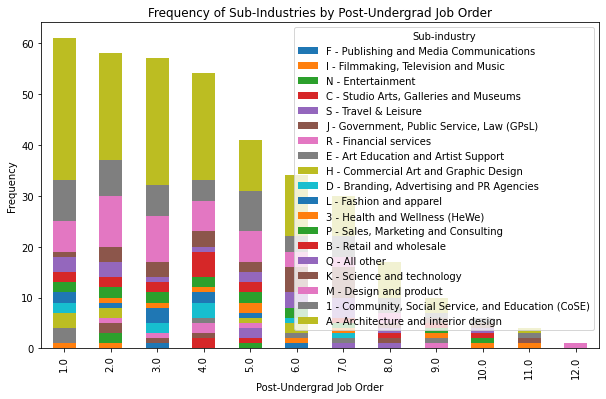

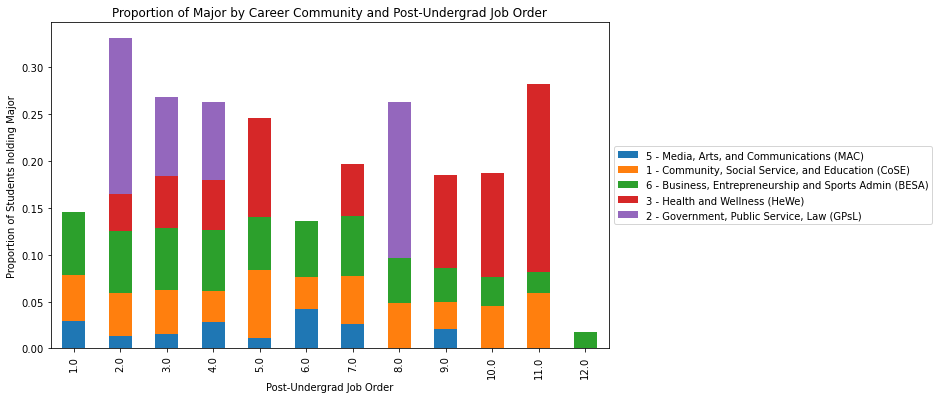

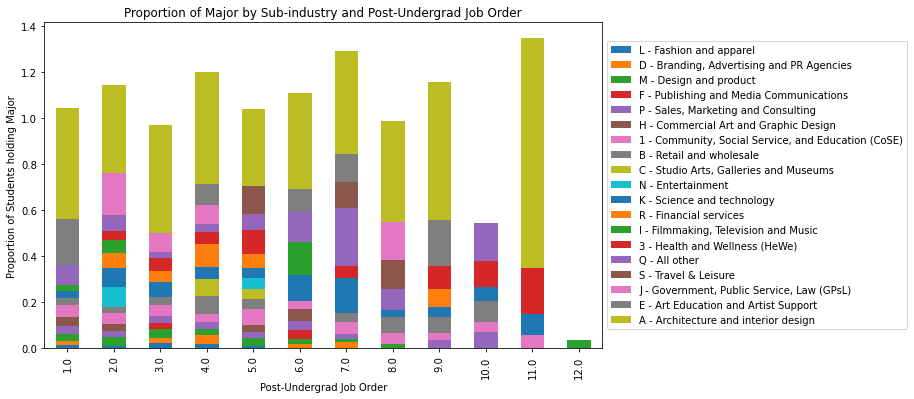


Sub-industry Proportions:
Sub-industry              L - Fashion and apparel  \
Post Undergrad Job Order                            
1.0                                      0.014599   
2.0                                      0.008621   
3.0                                      0.024000   
4.0                                      0.020619   
5.0                                      0.012195   
6.0                                           NaN   
7.0                                           NaN   
8.0                                           NaN   
9.0                                           NaN   
10.0                                          NaN   
11.0                                          NaN   
12.0                                          NaN   

Sub-industry              D - Branding, Advertising and PR Agencies  \
Post Undergrad Job Order                                              
1.0                                                        0.018349   
2.0              

In [184]:
community_industry_by_major(ArchitectureList)
architecture = add_major_column(MergeTable, ArchitectureList)

# Call the function with your DataFrame
result_career_community, result_sub_industry = plot_proportion_major_by_career_community(architecture)

# Print the resulting DataFrames of proportions
print("\nSub-industry Proportions:")
print(result_sub_industry)

### Illustration Majors

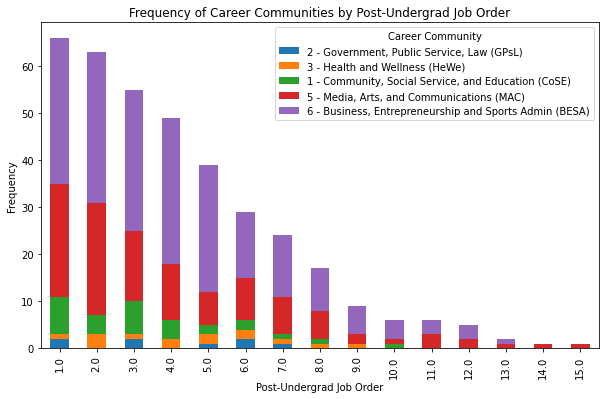

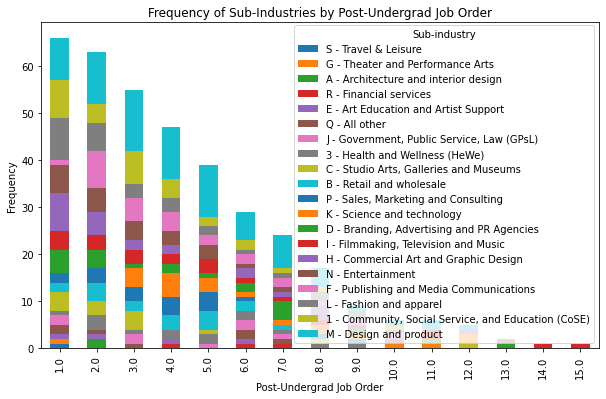

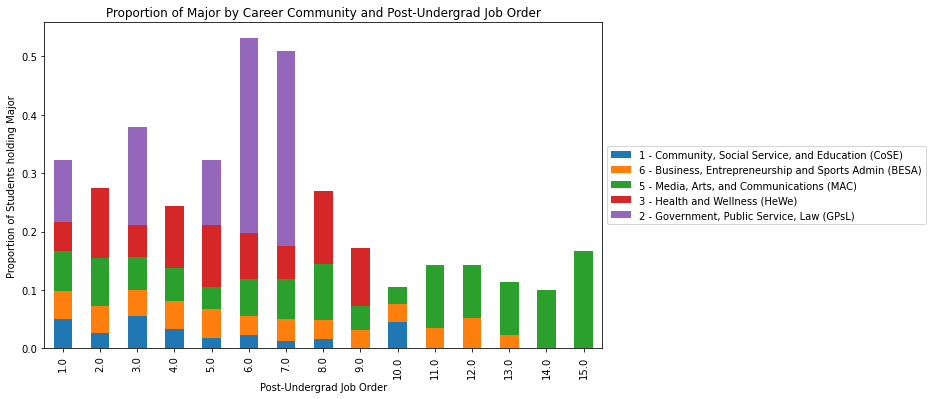

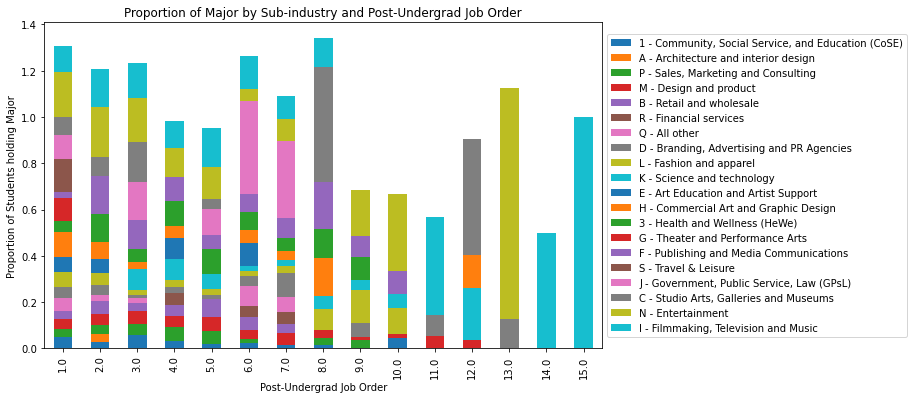


Sub-industry Proportions:
Sub-industry              1 - Community, Social Service, and Education (CoSE)  \
Post Undergrad Job Order                                                        
1.0                                                                0.050000     
2.0                                                                0.026144     
3.0                                                                0.056452     
4.0                                                                0.033613     
5.0                                                                0.018349     
6.0                                                                0.022727     
7.0                                                                0.012821     
8.0                                                                0.016129     
9.0                                                                     NaN     
10.0                                                               0.045455     
1

In [187]:
community_industry_by_major(IllustrationList)
illustration = add_major_column(MergeTable, IllustrationList)

# Call the function with your DataFrame
result_career_community, result_sub_industry = plot_proportion_major_by_career_community(illustration)

# Print the resulting DataFrames of proportions
print("\nSub-industry Proportions:")
print(result_sub_industry)

### Photography Majors

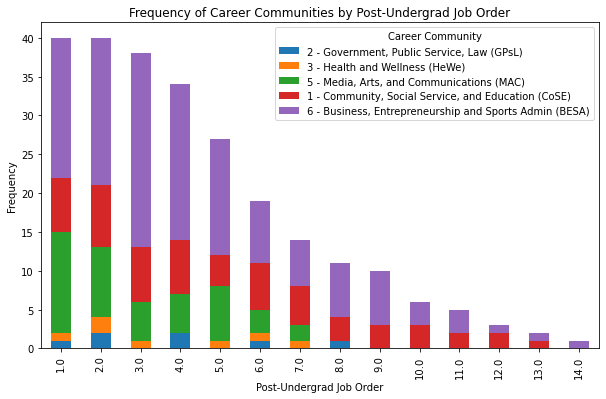

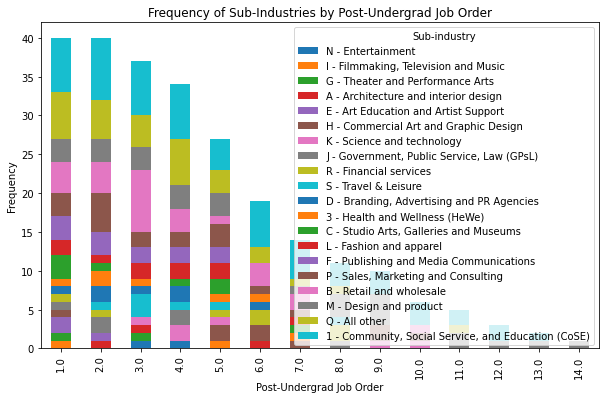

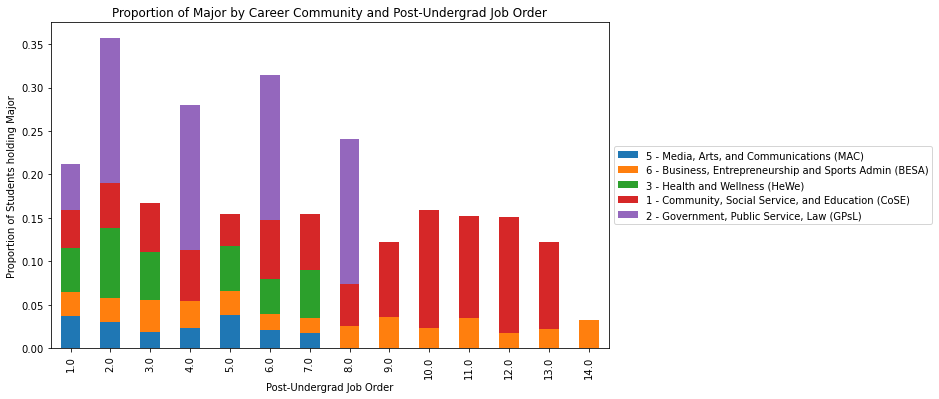

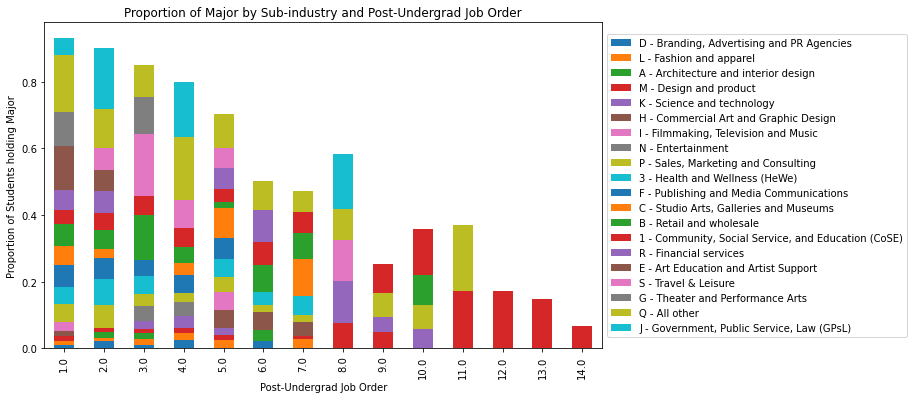


Sub-industry Proportions:
Sub-industry              D - Branding, Advertising and PR Agencies  \
Post Undergrad Job Order                                              
1.0                                                        0.009174   
2.0                                                        0.021978   
3.0                                                        0.010989   
4.0                                                        0.025974   
5.0                                                             NaN   
6.0                                                        0.021277   
7.0                                                             NaN   
8.0                                                             NaN   
9.0                                                             NaN   
10.0                                                            NaN   
11.0                                                            NaN   
12.0                                              

In [190]:
community_industry_by_major(PhotographyList)
photography = add_major_column(MergeTable, PhotographyList)

# Call the function with your DataFrame
result_career_community, result_sub_industry = plot_proportion_major_by_career_community(photography)

# Print the resulting DataFrames of proportions
print("\nSub-industry Proportions:")
print(result_sub_industry)

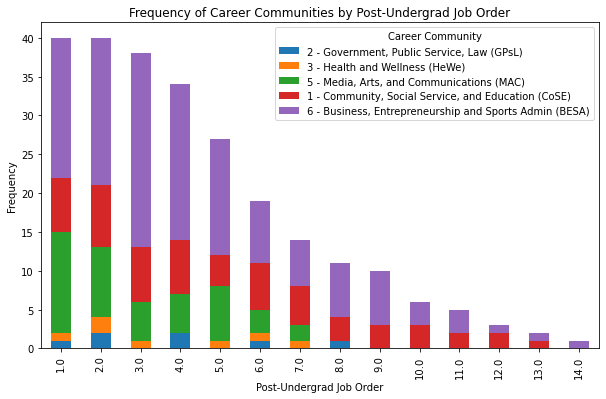

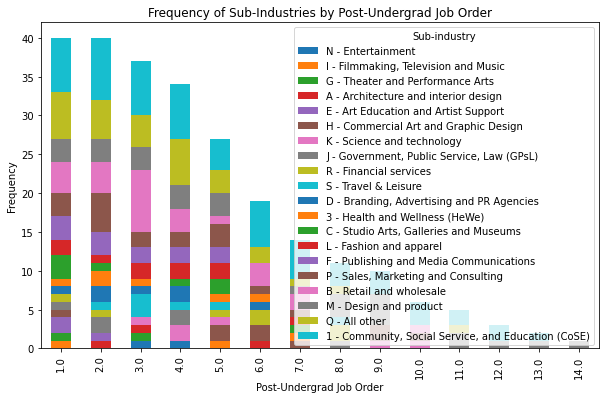

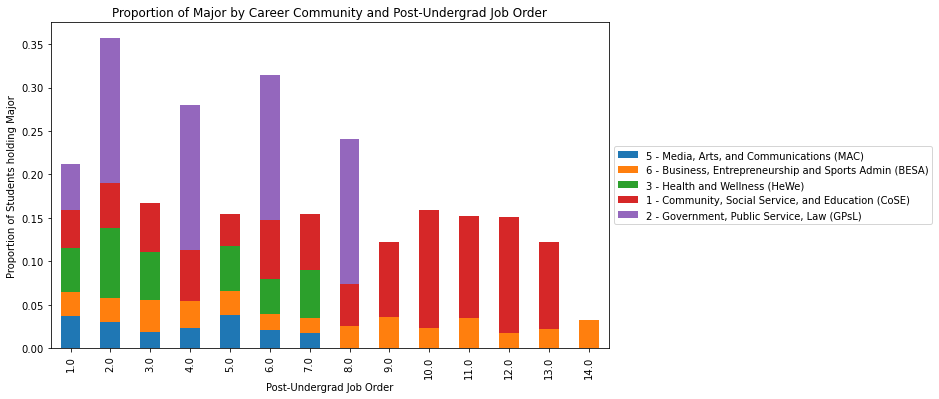

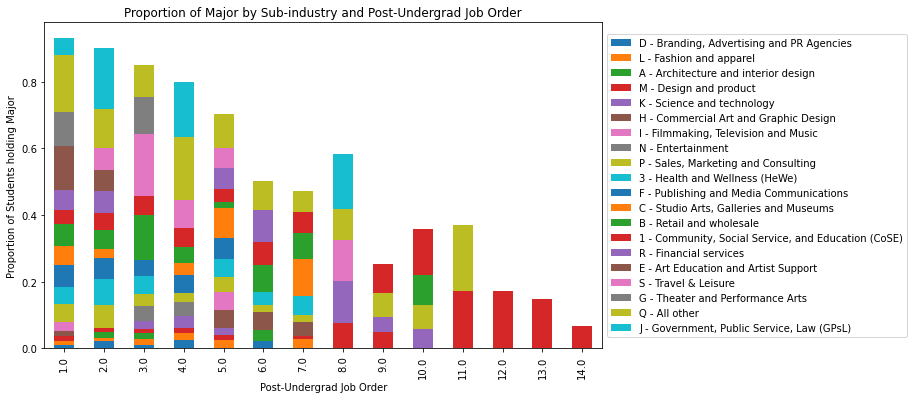


Sub-industry Proportions:
Sub-industry              D - Branding, Advertising and PR Agencies  \
Post Undergrad Job Order                                              
1.0                                                        0.009174   
2.0                                                        0.021978   
3.0                                                        0.010989   
4.0                                                        0.025974   
5.0                                                             NaN   
6.0                                                        0.021277   
7.0                                                             NaN   
8.0                                                             NaN   
9.0                                                             NaN   
10.0                                                            NaN   
11.0                                                            NaN   
12.0                                              

In [190]:
community_industry_by_major(PhotographyList)
photography = add_major_column(MergeTable, PhotographyList)

# Call the function with your DataFrame
result_career_community, result_sub_industry = plot_proportion_major_by_career_community(photography)

# Print the resulting DataFrames of proportions
print("\nSub-industry Proportions:")
print(result_sub_industry)